# Project 2: Ames Housing Data and Kaggle Challenge
---
## Table of Contents

1. [Introduction and Problem Statement](#1.-Introduction-and-Problem-Statement)
2. [Data Import and Cleaning](#2.-Data-Import-and-Cleaning)
3. [EDA](#3.-EDA)
4. [Pre-processing](#4.-Pre-processing)
5. [Modeling](#5.-Modeling)
6. [Final Model for Kaggle Submission](#6.-Final-model-for-kaggle-submission)
7. [Conclusion](#7.-Conclusion)
---

# 1. Introduction and Problem Statement

When it comes to real estate pricing, there is a famous old saying:
>"There are three things that matter in property: location, location, location."


With an increasing competitive housing market, there is a motivation to develop a housing price regression model for housing price prediction. Intuitively, the location of real estate is important, but the impact of factors on the pricing should not be understated. This project aims to produce a model can be used as a tool by real estate agents to aid their price evaluation of residential properties and seek to identify any attributes that influence property prices.

Our model will be built upon on the Ames Housing Dataset which contains the transactions between 2006 to 2010. The model will later be evaluated using  root mean squared error (RMSE) in the [Kaggle](https://www.kaggle.com/c/dsi-us-11-project-2-regression-challenge) platform. 

The data dictionary of the dataset can be found in this [link](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt). 

# 2. Data Import and Cleaning

### Importing libraries 
Aside from the standard libraries, libraries for linear regression and regularization tools were imported in anticipation for the linear regssion modeling.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

In [2]:
#change df viewing preference 
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 85)

In [3]:
# change plt style
plt.style.use("ggplot")

### Dataset 
The Ames Housing Dataset was split into `train.csv` and `test.csv`. The following series of inspections revealed the followings:

For the training dataset, 
- 2051 rows and 81 columns 
- Some of the categorical data were incorrectly assigned as numerical data.

For the testing dataset, 
- 878 rows and 80 columns (note: the target variable "SalePrice" is not available)
- Some of the categorical data were incorrectly assigned as numerical data.)

For the purpose of this project, `SalePrice` will be the target variable, whereas the rest of the 80 features could be used as predictors for linear regression model.  

In [4]:
#importing dataset
house_train = pd.read_csv('../datasets/train.csv')
house_test = pd.read_csv('../datasets/test.csv')

In [5]:
#View train dataset
house_train.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2  

In [6]:
#View test dataset
house_test.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0  Grvl       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
1   NaN       IR1          Lvl    AllPub     Inside        Gtl       Sawyer   
2   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
3   NaN       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
4   NaN       IR1          Lvl    AllPub     Inside        Gtl        NAmes   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        Norm        Norm    2fmCon      2Story             6             8   
1        Norm        Norm    Duplex      1Story             5             4   
2        Norm        Norm      1Fam      2Story             7             5   
3        Norm        Norm      1Fam      1Story             5             6   
4        Norm        Norm      1Fam      1Story             6             5   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1910            1950      Gable   CompShg      AsbShng      AsbShng   
1        1977            1977      Gable   CompShg      Plywood      Plywood   
2        2006            2006      Gable   CompShg      VinylSd      VinylSd   
3        1923            2006      Gable   CompShg      Wd Sdng      Wd Sdng   
4        1963            1963      Gable   CompShg      Plywood      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0         None           0.0         TA         Fa      Stone        Fa   
1         None           0.0         TA         TA     CBlock        Gd   
2         None           0.0         Gd         TA      PConc        Gd   
3         None           0.0         Gd         TA     CBlock        TA   
4      BrkFace         247.0         TA         TA     CBlock        Gd   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            Unf             0            Unf   
1        TA            No            Unf             0            Unf   
2        Gd            Av            GLQ           554            Unf   
3        TA            No            Unf             0            Unf   
4        TA            No            BLQ           609            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0             0         1020           1020    GasA         Gd           N   
1             0         1967           1967    GasA         TA           Y   
2             0          100            654    GasA         Ex           Y   
3             0          968            968    GasA         TA           Y   
4             0          785           1394    GasA         Gd           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      FuseP         908        1020                0         1928   
1      SBrkr        1967           0                0         1967   
2      SBrkr         664         832                0         1496   
3      SBrkr         968           0                0          968   
4      SBrkr        1394           0                0         1394   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0               0               0          2          0              4   
1               0               0          2          0              6   
2               1               0          2          1              3   
3               0               0        

In [7]:
#View shape of datasets
print(house_train.shape)
print(house_test.shape)

(2051, 81)
(878, 80)


In [8]:
#view summary statistical information
display(house_train.describe())
display(house_train.describe())

Id           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2051.000000  2.051000e+03  2051.000000   1721.000000    2051.000000   
mean   1474.033642  7.135900e+08    57.008776     69.055200   10065.208191   
std     843.980841  1.886918e+08    42.824223     23.260653    6742.488909   
min       1.000000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     753.500000  5.284581e+08    20.000000     58.000000    7500.000000   
50%    1486.000000  5.354532e+08    50.000000     68.000000    9430.000000   
75%    2198.000000  9.071801e+08    70.000000     80.000000   11513.500000   
max    2930.000000  9.241520e+08   190.000000    313.000000  159000.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2051.000000   2051.000000  2051.000000     2051.000000   2029.000000   
mean       6.112140      5.562165  1971.708922     1984.190151     99.695909   
std        1.426271      1.104497    30.177889       21.036250    174.963129   
min        1.000000      1.000000  1872.000000     1950.000000      0.000000   
25%        5.000000      5.000000  1953.500000     1964.500000      0.000000   
50%        6.000000      5.000000  1974.000000     1993.000000      0.000000   
75%        7.000000      6.000000  2001.000000     2004.000000    161.000000   
max       10.000000      9.000000  2010.000000     2010.000000   1600.000000   

       BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF   1st Flr SF  \
count   2050.000000   2050.000000  2050.000000    2050.000000  2051.000000   
mean     442.300488     47.959024   567.728293    1057.987805  1164.488055   
std      461.204124    165.000901   444.954786     449.410704   396.446923   
min        0.000000      0.000000     0.000000       0.000000   334.000000   
25%        0.000000      0.000000   220.000000     793.000000   879.500000   
50%      368.000000      0.000000   474.500000     994.500000  1093.000000   
75%      733.750000      0.000000   811.000000    1318.750000  1405.000000   
max     5644.000000   1474.000000  2336.000000    6110.000000  5095.000000   

        2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
count  2051.000000      2051.000000  2051.000000     2049.000000   
mean    329.329108         5.512921  1499.330083        0.427526   
std     425.671046        51.068870   500.447829        0.522673   
min       0.000000         0.000000   334.000000        0.000000   
25%       0.000000         0.000000  1129.000000        0.000000   
50%       0.000000         0.000000  1444.000000        0.000000   
75%     692.500000         0.000000  1728.500000        1.000000   
max    1862.000000      1064.000000  5642.000000        3.000000   

       Bsmt Half Bath    Full Bath    Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
count     2049.000000  2051.000000  2051.000000    2051.000000    2051.000000   
mean         0.063446     1.577279     0.371039       2.843491       1.042906   
std          0.251705     0.549279     0.501043       0.826618       0.209790   
min          0.000000     0.000000     0.000000       0.000000       0.000000   
25%          0.000000     1.000000     0.000000       2.000000       1.000000   
50%          0.000000     2.000000     0.000000       3.000000       1.000000   
75%          0.000000     2.000000     1.000000       3.000000       1.000000   
max          2.000000     4.000000     2.000000       8.000000       3.000000   

       TotRms AbvGrd   Fireplaces  Garage Yr Blt  Garage Cars  Garage Area  \
count    2051.000000  2051.000000    1937.000000  2050.000000  2050.000000   
mean        6.435885     0.590931    1978.707796     1.776585   473.671707   
std         1.560225     0.638516      25.441094     0.764537   215.934561   
min         2.000000     0.000000    1895.000000     0.000000     0.000000   
25%         5.000000     0.000000    1961.000000     1.000000   319.000000   
50%         6.000000     1.000000    1980.000000     2.000000   480.000000   


Id           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2051.000000  2.051000e+03  2051.000000   1721.000000    2051.000000   
mean   1474.033642  7.135900e+08    57.008776     69.055200   10065.208191   
std     843.980841  1.886918e+08    42.824223     23.260653    6742.488909   
min       1.000000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     753.500000  5.284581e+08    20.000000     58.000000    7500.000000   
50%    1486.000000  5.354532e+08    50.000000     68.000000    9430.000000   
75%    2198.000000  9.071801e+08    70.000000     80.000000   11513.500000   
max    2930.000000  9.241520e+08   190.000000    313.000000  159000.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2051.000000   2051.000000  2051.000000     2051.000000   2029.000000   
mean       6.112140      5.562165  1971.708922     1984.190151     99.695909   
std        1.426271      1.104497    30.177889       21.036250    174.963129   
min        1.000000      1.000000  1872.000000     1950.000000      0.000000   
25%        5.000000      5.000000  1953.500000     1964.500000      0.000000   
50%        6.000000      5.000000  1974.000000     1993.000000      0.000000   
75%        7.000000      6.000000  2001.000000     2004.000000    161.000000   
max       10.000000      9.000000  2010.000000     2010.000000   1600.000000   

       BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF   1st Flr SF  \
count   2050.000000   2050.000000  2050.000000    2050.000000  2051.000000   
mean     442.300488     47.959024   567.728293    1057.987805  1164.488055   
std      461.204124    165.000901   444.954786     449.410704   396.446923   
min        0.000000      0.000000     0.000000       0.000000   334.000000   
25%        0.000000      0.000000   220.000000     793.000000   879.500000   
50%      368.000000      0.000000   474.500000     994.500000  1093.000000   
75%      733.750000      0.000000   811.000000    1318.750000  1405.000000   
max     5644.000000   1474.000000  2336.000000    6110.000000  5095.000000   

        2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
count  2051.000000      2051.000000  2051.000000     2049.000000   
mean    329.329108         5.512921  1499.330083        0.427526   
std     425.671046        51.068870   500.447829        0.522673   
min       0.000000         0.000000   334.000000        0.000000   
25%       0.000000         0.000000  1129.000000        0.000000   
50%       0.000000         0.000000  1444.000000        0.000000   
75%     692.500000         0.000000  1728.500000        1.000000   
max    1862.000000      1064.000000  5642.000000        3.000000   

       Bsmt Half Bath    Full Bath    Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
count     2049.000000  2051.000000  2051.000000    2051.000000    2051.000000   
mean         0.063446     1.577279     0.371039       2.843491       1.042906   
std          0.251705     0.549279     0.501043       0.826618       0.209790   
min          0.000000     0.000000     0.000000       0.000000       0.000000   
25%          0.000000     1.000000     0.000000       2.000000       1.000000   
50%          0.000000     2.000000     0.000000       3.000000       1.000000   
75%          0.000000     2.000000     1.000000       3.000000       1.000000   
max          2.000000     4.000000     2.000000       8.000000       3.000000   

       TotRms AbvGrd   Fireplaces  Garage Yr Blt  Garage Cars  Garage Area  \
count    2051.000000  2051.000000    1937.000000  2050.000000  2050.000000   
mean        6.435885     0.590931    1978.707796     1.776585   473.671707   
std         1.560225     0.638516      25.441094     0.764537   215.934561   
min         2.000000     0.000000    1895.000000     0.000000     0.000000   
25%         5.000000     0.000000    1961.000000     1.000000   319.000000   
50%         6.000000     1.000000    1980.000000     2.000000   480.000000   


In [9]:
#modify attribute names to follow 
house_train.columns = house_train.columns.str.lower().str.replace(' ', '_')
house_test.columns = house_test.columns.str.lower().str.replace(' ', '_')

In [10]:
#view datatypes in train dataset
house_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [11]:
#view datatypes in test dataset
house_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               878 non-null    int64  
 1   pid              878 non-null    int64  
 2   ms_subclass      878 non-null    int64  
 3   ms_zoning        878 non-null    object 
 4   lot_frontage     718 non-null    float64
 5   lot_area         878 non-null    int64  
 6   street           878 non-null    object 
 7   alley            58 non-null     object 
 8   lot_shape        878 non-null    object 
 9   land_contour     878 non-null    object 
 10  utilities        878 non-null    object 
 11  lot_config       878 non-null    object 
 12  land_slope       878 non-null    object 
 13  neighborhood     878 non-null    object 
 14  condition_1      878 non-null    object 
 15  condition_2      878 non-null    object 
 16  bldg_type        878 non-null    object 
 17  house_style     

In [12]:
#Check for duplication 
print(house_test.duplicated().sum())
print(house_train.duplicated().sum())

0
0


### Missing values

There were multiple `NaN` values in the dataframes. Upon reviewing the data dictionary, majority of `NaN` values were are part of the expected value for the dataset. e.g. "None" if there is no fireplace in the residential unit. As such the datasets were re-imported with that in mind and would only assign `NaN` when there is a missing value instead. 

The number of `NaN` counts in the dataframes decreased from 13,993 to 719 after redefining that `NaN` would only be assigned to missing values in the dataset. 

 

In [13]:
#Total count for NaN values
print(house_train.isna().sum().sum())
print(house_test.isna().sum().sum())

9822
4171


In [14]:
#Check for missing values in original train dataset
[{column: house_train[column].isna().sum()} for column in house_train if house_train[column].isna().sum() != 0]

[{'lot_frontage': 330},
 {'alley': 1911},
 {'mas_vnr_type': 22},
 {'mas_vnr_area': 22},
 {'bsmt_qual': 55},
 {'bsmt_cond': 55},
 {'bsmt_exposure': 58},
 {'bsmtfin_type_1': 55},
 {'bsmtfin_sf_1': 1},
 {'bsmtfin_type_2': 56},
 {'bsmtfin_sf_2': 1},
 {'bsmt_unf_sf': 1},
 {'total_bsmt_sf': 1},
 {'bsmt_full_bath': 2},
 {'bsmt_half_bath': 2},
 {'fireplace_qu': 1000},
 {'garage_type': 113},
 {'garage_yr_blt': 114},
 {'garage_finish': 114},
 {'garage_cars': 1},
 {'garage_area': 1},
 {'garage_qual': 114},
 {'garage_cond': 114},
 {'pool_qc': 2042},
 {'fence': 1651},
 {'misc_feature': 1986}]

In [15]:
#Check for missing values in original test dataset
[{column: house_test[column].isna().sum()} for column in house_test if house_test[column].isna().sum() != 0]

[{'lot_frontage': 160},
 {'alley': 820},
 {'mas_vnr_type': 1},
 {'mas_vnr_area': 1},
 {'bsmt_qual': 25},
 {'bsmt_cond': 25},
 {'bsmt_exposure': 25},
 {'bsmtfin_type_1': 25},
 {'bsmtfin_type_2': 25},
 {'electrical': 1},
 {'fireplace_qu': 422},
 {'garage_type': 44},
 {'garage_yr_blt': 45},
 {'garage_finish': 45},
 {'garage_qual': 45},
 {'garage_cond': 45},
 {'pool_qc': 874},
 {'fence': 706},
 {'misc_feature': 837}]

In [16]:
#Re-import the dataset with consideration of None, NA, N/A as an expected value. 
house_train = pd.read_csv('../datasets/train.csv', keep_default_na= False, na_values='')
house_test = pd.read_csv('../datasets/test.csv', keep_default_na= False, na_values='')

#modify attribute names to follow 
house_train.columns = house_train.columns.str.lower().str.replace(' ', '_')
house_test.columns = house_test.columns.str.lower().str.replace(' ', '_')

In [17]:
#Re-evaluate total count for NaN values
print(house_train.isna().sum().sum())
print(house_test.isna().sum().sum())

510
209


In [18]:
#Re-evalutate for missing NaN in train dataset
[{column: house_train[column].isna().sum()} for column in house_train if house_train[column].isna().sum() != 0]

[{'lot_frontage': 330},
 {'mas_vnr_type': 22},
 {'mas_vnr_area': 22},
 {'bsmt_qual': 1},
 {'bsmt_cond': 1},
 {'bsmt_exposure': 4},
 {'bsmtfin_type_1': 1},
 {'bsmtfin_sf_1': 1},
 {'bsmtfin_type_2': 2},
 {'bsmtfin_sf_2': 1},
 {'bsmt_unf_sf': 1},
 {'total_bsmt_sf': 1},
 {'bsmt_full_bath': 2},
 {'bsmt_half_bath': 2},
 {'garage_yr_blt': 114},
 {'garage_finish': 1},
 {'garage_cars': 1},
 {'garage_area': 1},
 {'garage_qual': 1},
 {'garage_cond': 1}]

In [19]:
#Re-evalutate for missing NaN in test dataset
[{column: house_test[column].isna().sum()} for column in house_test if house_test[column].isna().sum() != 0]

[{'lot_frontage': 160},
 {'mas_vnr_type': 1},
 {'mas_vnr_area': 1},
 {'electrical': 1},
 {'garage_yr_blt': 45},
 {'garage_finish': 1}]

### Remaining missing values

Simple imputation:
- 460 observations for `lot_frontage` imputed using median values. 

- Observations Id 2237 and Id 1357 for `garage_yr_blt` imputed using median values

- Observation Id 1578 for `electrical` imputed using mode

- Observation Id 1357  `garage_finish` imputed using mode 

- Observation Id 2237 `garage_finish`, `garage_cars`, `garage_area`, `garage_qual`, `garage_cond` imputed with median values or mode

Logical imputation:

- For the remaining missing values, it was assumed that each of the value was meant to be "None" or "0" but was incorrectly left empty instead. 



In [20]:
#Simple impute (median) for lot_frontage
imput_median = SimpleImputer(strategy='median')
house_train['lot_frontage'] = imput_median.fit_transform(house_train.loc[:,['lot_frontage']])
house_test['lot_frontage'] = imput_median.fit_transform(house_test.loc[:,['lot_frontage']])

In [21]:
#Impute median for garage_yr_blt in id 2237 and 1357. The remainding observation will be filled with 0
house_train.loc[1712,'garage_yr_blt'] = house_train['garage_yr_blt'].median()
house_train['garage_yr_blt'].fillna(0, inplace=True)
house_test.loc[764, 'garage_yr_blt'] = house_test['garage_yr_blt'].median()
house_test['garage_yr_blt'].fillna(0, inplace=True)

In [22]:
# Simple impute (mode) for electircal 
imput_mode = SimpleImputer(strategy='most_frequent')
house_test['electrical'] = imput_mode.fit_transform(house_test.loc[:,['electrical']])

In [23]:
# Impute None for mas_vnr_type
house_train['mas_vnr_type'].fillna('None', inplace=True)
house_test['mas_vnr_type'].fillna('None', inplace=True)

In [24]:
# Impute 0 for mas_vnr_area
house_train['mas_vnr_area'].fillna(0, inplace=True)
house_test['mas_vnr_area'].fillna(0, inplace=True)

In [25]:
# Imput 'No Basement' for basement related predictors
attributes = ['bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2']
house_train[attributes] = house_train[attributes].fillna('NA')

#Imput 0 for basement related predictors 
attributes = ['bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', 'bsmt_full_bath', 'bsmt_half_bath' ]
house_train[attributes] = house_train[attributes].fillna(0)

In [26]:
# Impute Garage related predictors with median values 

house_train['garage_cars'] = imput_median.fit_transform(house_train.loc[:,['garage_cars']])
house_train['garage_area'] = imput_median.fit_transform(house_train.loc[:,['garage_area']])

In [27]:
# Impute Garage related predictors with mode 
attributes = ['garage_finish', 'garage_qual', 'garage_cond']
for attr in attributes:
    house_train[attr] = imput_mode.fit_transform(house_train.loc[:,[attr]])

In [28]:
# Simple impute (mode) for Garage Finish' 
house_test['garage_finish'] = imput_mode.fit_transform(house_test.loc[:,['garage_finish']])

In [29]:
# Verify for missing values 
print(house_test.isna().sum().sum())
print(house_train.isna().sum().sum())

0
0


### Correction to observation id 1699 in `garage_yr_blt` 

Observation Id 2261 has `garage_yr_blt` recorded as 2207. This would be impossible and likely as data entry error. To remediate the error, the year garage was built would assumed to be the same year as building was built.

In [30]:
house_train.loc[1699,'garage_yr_blt'] = house_train[house_train['garage_yr_blt'] == 2207]['year_built'].values

### Encode ordinal attributes
Based on the ranking in the data dictionary, the dataframes will be encoded accordingly.

In [31]:
# introduce ordinal dictionary data according to their ranking (based on the description in data dictionary)

ordinal_dic =  {
    'lot_shape': {
        'IR3': 0,
        'IR2': 1,
        'IR1': 2,
        'Reg': 3 
    }, 
    'utilities': {
        'ELO': 0,
        'NoSeWa': 1,
        'NoSewr': 2,
        'AllPub': 3
    },
    'land_slope': {
        'Gtl': 2,
        'Mod': 1,
        'Sev': 0
    },
    'exter_qual': {
        'Ex': 4,
        'Gd': 3,
        'TA': 2,
        'Fa': 1,
        'Po': 0
    }, 
    'exter_cond': {
        'Ex': 4,
        'Gd': 3,
        'TA': 2,
        'Fa': 1,
        'Po': 0
    },
    'bsmt_qual': {
        'Ex': 5,
        'Gd': 4,
        'TA': 3,
        'Fa': 2,
        'Po': 1,
        'NA': 0
    }, 
    'bsmt_exposure': {
        'Gd': 4,
        'Av': 3,
        'Mn': 2,
        'No': 1,
        'NA': 0
    },
    'bsmtfin_type_1': {
        'GLQ': 6,
        'ALQ': 5,
        'BLQ': 4,
        'Rec': 3,
        'LwQ': 2,
        'Unf': 1,
        'NA': 0
    }, 
    'bsmtfin_type_2' :{
        'GLQ': 6,
        'ALQ': 5,
        'BLQ': 4,
        'Rec': 3,
        'LwQ': 2,
        'Unf': 1,
        'NA': 0
    },
    'heating_qc': {
        'Ex': 4,
        'Gd': 3,
        'TA': 2,
        'Fa': 1,
        'Po': 0
    },
    'electrical': {
        'SBrkr': 4,
        'FuseA': 3,
        'FuseF': 2,
        'FuseP': 1,
        'Mix': 0
    },
    'kitchen_qual': {
        'Ex': 4,
        'Gd': 3,
        'TA': 2,
        'Fa': 1,
        'Po': 0
    },
    'fireplace_qu': {
        'Ex': 5,
        'Gd': 4,
        'TA': 3,
        'Fa': 2,
        'Po': 1,
        'NA': 0
    },
    'garage_qual': {
        'Ex': 5,
        'Gd': 4,
        'TA': 3,
        'Fa': 2,
        'Po': 1,
        'NA': 0
    },
    'garage_cond': {
        'Ex': 5,
        'Gd': 4,
        'TA': 3,
        'Fa': 2,
        'Po': 1,
        'NA': 0
    },
    'paved_drive': {
        'Y': 2,
        'P': 1,
        'N': 0 
    },
    'pool_qc': {
        'Ex': 4,
        'Gd': 3,
        'TA': 2,
        'Fa': 1,
        'NA': 0
    }, 
    'fence': {
        'GdPrv': 4,
        'MnPrv': 3,
        'GdWo': 2,
        'MnWw': 1,
        'NA': 0,
    }
}

In [32]:
# encode ordinal 
house_train.replace(ordinal_dic, inplace=True)
house_test.replace(ordinal_dic, inplace=True)

In [33]:
house_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               878 non-null    int64  
 1   pid              878 non-null    int64  
 2   ms_subclass      878 non-null    int64  
 3   ms_zoning        878 non-null    object 
 4   lot_frontage     878 non-null    float64
 5   lot_area         878 non-null    int64  
 6   street           878 non-null    object 
 7   alley            878 non-null    object 
 8   lot_shape        878 non-null    int64  
 9   land_contour     878 non-null    object 
 10  utilities        878 non-null    int64  
 11  lot_config       878 non-null    object 
 12  land_slope       878 non-null    int64  
 13  neighborhood     878 non-null    object 
 14  condition_1      878 non-null    object 
 15  condition_2      878 non-null    object 
 16  bldg_type        878 non-null    object 
 17  house_style     

# 3. EDA
The analysis would focus only on the the training dataset and would assume that the testing dataset has the same distribution.

In [34]:
#creating lists of features by numerical and categorical 
cat_features = house_train.select_dtypes(exclude='number').columns.to_list()
num_features = house_train.select_dtypes(include='number').columns.to_list()

### Graphing numerical features
The following section would explore the distribution of target and predictors variables .

In [35]:
#check length of features 
print(f'Number of numerical features  : {len(num_features)}')
print(f'Number of categorical features: {len(cat_features)}')
print(f'Total features                : {len(num_features) + len(cat_features)}')

Number of numerical features  : 57
Number of categorical features: 24
Total features                : 81


In [36]:
#create function for plotting
def plot_func(dataframe, attr, **kwarg):
    ''' Plot histogram, scatter plot, box plot, and qq plot in a figure.
    
    Note: 
    - For scatter plot, the attribute is plotted agaist saleprice.
    - Box plot is overlaid with strip plot to provide a sense of distribution of the data. 
    - There for categorical features, there will be no qq plot
    
    Parameters:
    data (dataframe): pandas dataframe 
    attr (list): list of dataframe column names to be plotted
    kwarg (string): accept attr: saleprice

    Returns:
    Nil'''
    row = len(attr)
    col = 3 if kwarg else 4
    figsize = (20, row*4)
    fig, ax = plt.subplots(nrows=row, ncols=col, figsize=figsize, constrained_layout=True) 
    for x in range(row):
            #histogram plot
            sns.histplot(x=attr[x], data=dataframe, ax=ax[x,0], color='tab:red')
            ax[x, 0].set_title(f'histogram: {attr[x]}')
            ax[x, 0].tick_params(labelrotation=90, axis='x')
            #scatter plot
            sns.scatterplot(x=attr[x], y='saleprice', data=dataframe, ax=ax[x,1])
            ax[x, 1].set_title(f'scatter plot: {attr[x]}')
            ax[x, 1].tick_params(labelrotation=90, axis='x')
            #box plot
            if kwarg:
                sns.boxplot(x=attr[x], y=kwarg['y_attr'], data=dataframe, ax=ax[x,2])
                sns.stripplot(x=attr[x], y=kwarg['y_attr'], data=dataframe, ax=ax[x,2], alpha= 0.2)
            else:
                sns.boxplot(x=attr[x], data=dataframe, ax=ax[x,2])
                sns.stripplot(x=attr[x], data=dataframe, ax=ax[x,2], alpha= 0.2)
            ax[x, 2].set_title(f'boxplot: {attr[x]}')
            ax[x, 2].tick_params(labelrotation=90, axis='x')
            #qq plot
            if kwarg:
                pass
            else:
                sm.qqplot(data= dataframe[attr[x]], line='45', fit=True, ax=ax[x,3])
                ax[x, 3].get_lines()[1].set_color('tab:blue')
                ax[x, 3].set_title(f'qqplot: {attr[x]}')
                ax[x, 3].tick_params(labelrotation=90, axis='x')
            
    plt.show()

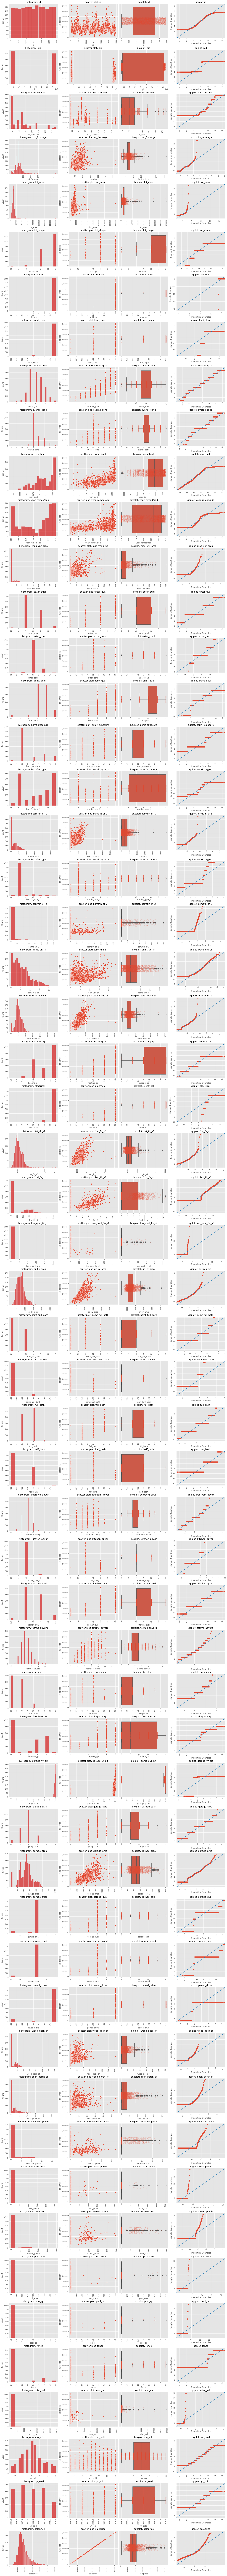

In [37]:
#plot numerical features
plot_func(house_train, num_features)

### Graphing categorical features

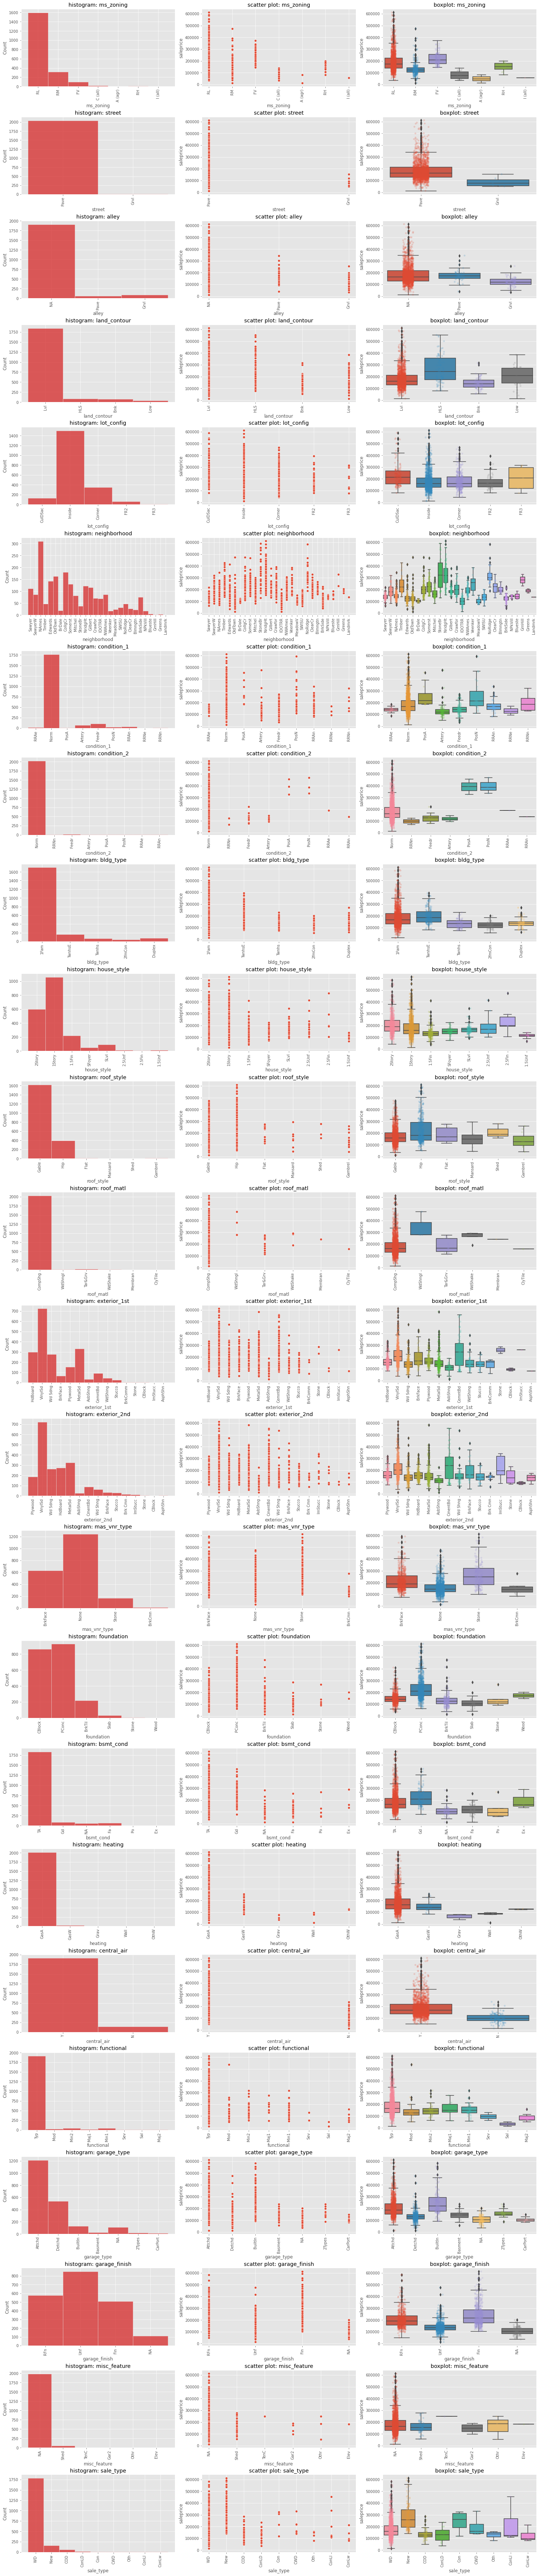

In [38]:
#plot categorical features
plot_func(house_train, cat_features, y_attr='saleprice')

### Heatmap

In [39]:
#one-hot encode categorical features
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
ohe.fit(house_train[cat_features])
cat_df = pd.DataFrame(ohe.transform(house_train[cat_features]), columns=ohe.get_feature_names_out())

In [40]:
cat_df.shape

(2051, 178)

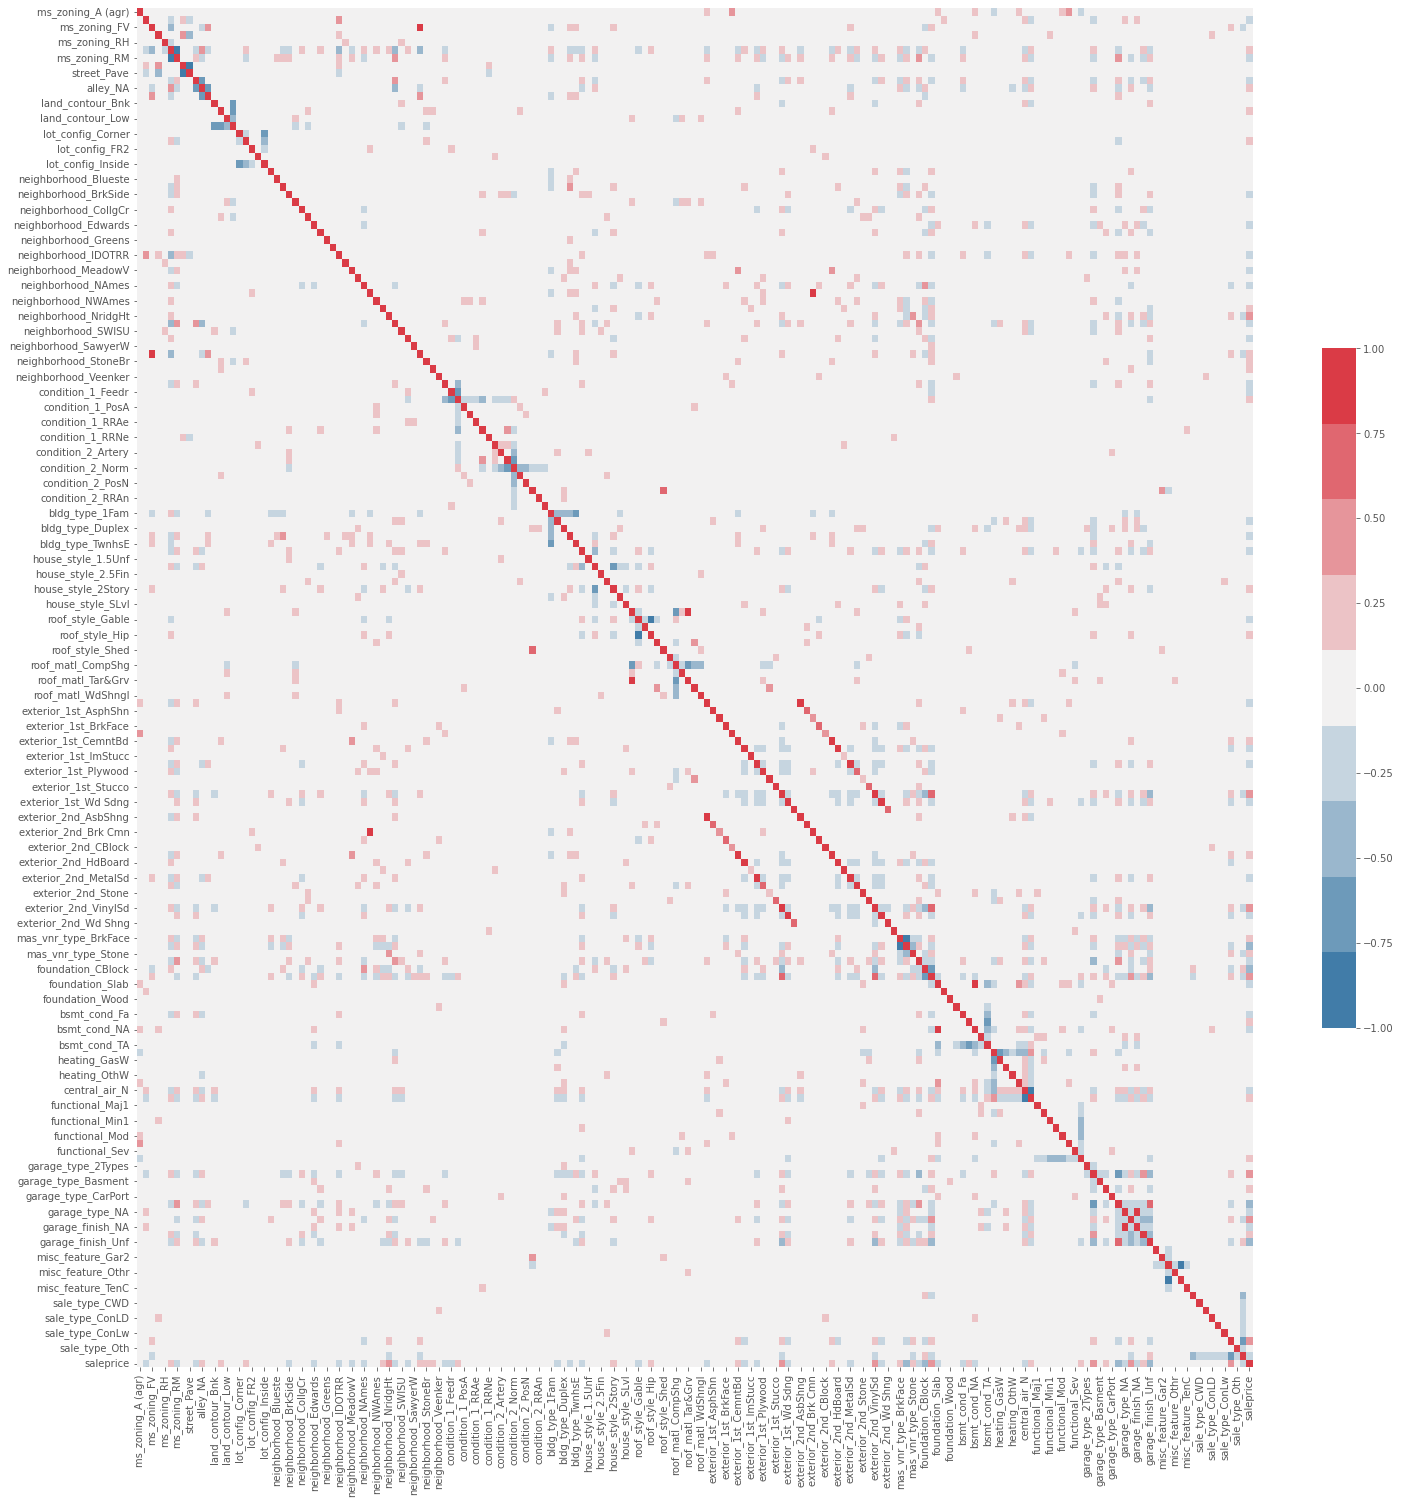

In [41]:
#plot heatmap for categorical features
plt.figure(figsize=(25,25))
sns.heatmap(pd.concat([cat_df, house_train['saleprice']], axis=1).corr(), cmap=sns.diverging_palette(240, 10, n=9),cbar_kws={"shrink": 0.5});

In [42]:
#print top attributes with negative correlation with saleprice
pd.concat([cat_df, house_train['saleprice']], axis=1).corr()['saleprice'].sort_values().head(15)

garage_finish_Unf      -0.432527
mas_vnr_type_None      -0.411170
garage_type_Detchd     -0.370344
foundation_CBlock      -0.355535
ms_zoning_RM           -0.281951
central_air_N          -0.277378
roof_style_Gable       -0.249329
garage_type_NA         -0.230990
garage_finish_NA       -0.230990
foundation_BrkTil      -0.229891
sale_type_WD           -0.212542
neighborhood_OldTown   -0.208371
house_style_1.5Fin     -0.195803
exterior_1st_Wd Sdng   -0.191734
neighborhood_NAmes     -0.189387
Name: saleprice, dtype: float64

In [43]:
#print top attributes with positive correlation with saleprice
pd.concat([cat_df, house_train['saleprice']], axis=1).corr()['saleprice'].sort_values(ascending=False).head(15)

saleprice               1.000000
foundation_PConc        0.529047
neighborhood_NridgHt    0.448647
garage_finish_Fin       0.422936
sale_type_New           0.358102
garage_type_Attchd      0.357879
exterior_1st_VinylSd    0.342146
exterior_2nd_VinylSd    0.337563
mas_vnr_type_Stone      0.310026
central_air_Y           0.277378
roof_style_Hip          0.265224
neighborhood_NoRidge    0.263395
mas_vnr_type_BrkFace    0.257901
neighborhood_StoneBr    0.256977
ms_zoning_RL            0.231468
Name: saleprice, dtype: float64

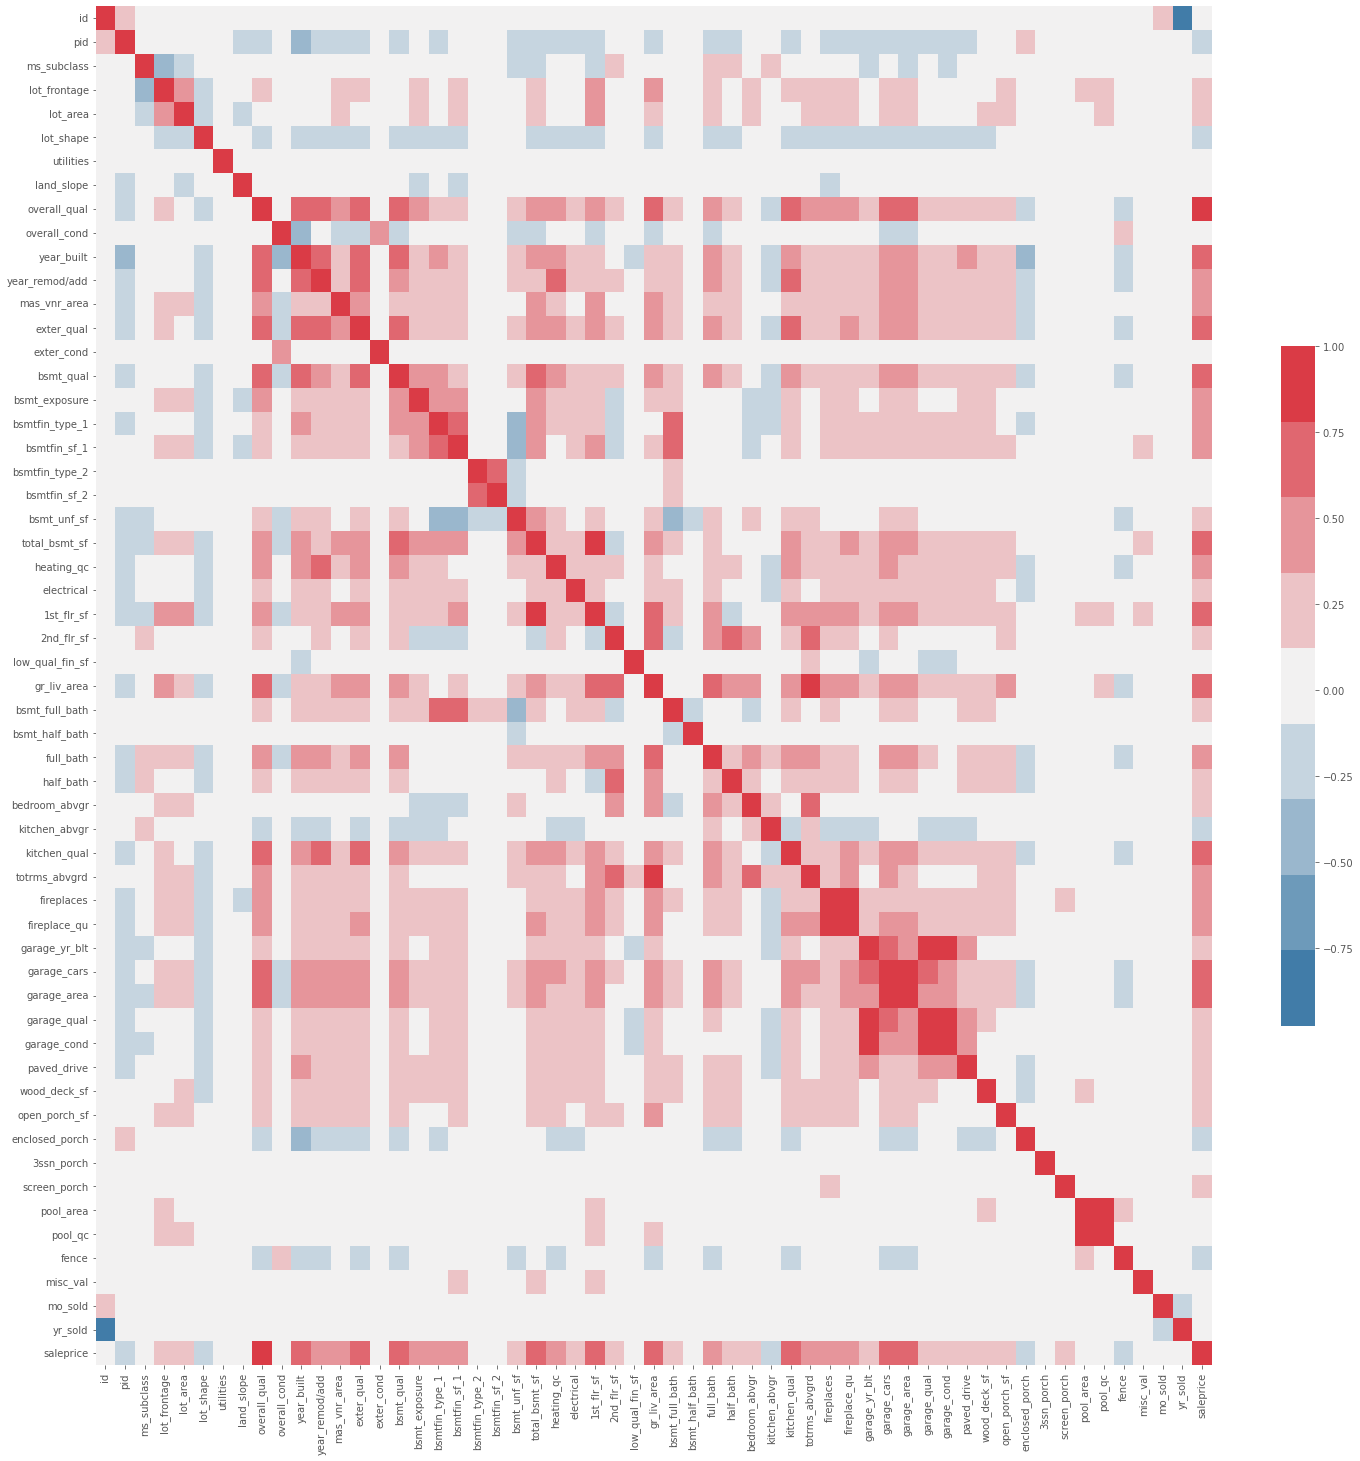

In [44]:
#plot heatmap for numerical features
plt.figure(figsize=(25,25))
sns.heatmap(house_train.corr(), cmap=sns.diverging_palette(240, 10, n=9), cbar_kws={"shrink": 0.5});

In [45]:
#print top attributes with negative correlation with saleprice
house_train.corr()['saleprice'].sort_values().head(15)

lot_shape         -0.294542
pid               -0.255052
fence             -0.159060
enclosed_porch    -0.135656
kitchen_abvgr     -0.125444
overall_cond      -0.097019
ms_subclass       -0.087335
land_slope        -0.057990
id                -0.051398
bsmt_half_bath    -0.045290
low_qual_fin_sf   -0.041594
yr_sold           -0.015203
misc_val          -0.007375
bsmtfin_type_2     0.014070
bsmtfin_sf_2       0.016432
Name: saleprice, dtype: float64

In [46]:
#print top attributes with positive correlation with saleprice
house_train.corr()['saleprice'].sort_values(ascending=False).head(25)

saleprice         1.000000
overall_qual      0.800207
exter_qual        0.712146
gr_liv_area       0.697038
kitchen_qual      0.692336
garage_area       0.650241
garage_cars       0.648128
total_bsmt_sf     0.629303
1st_flr_sf        0.618486
bsmt_qual         0.612188
year_built        0.571849
year_remod/add    0.550370
fireplace_qu      0.538925
full_bath         0.537969
totrms_abvgrd     0.504014
mas_vnr_area      0.503579
fireplaces        0.471093
heating_qc        0.458354
bsmt_exposure     0.424863
bsmtfin_sf_1      0.423856
bsmtfin_type_1    0.350362
open_porch_sf     0.333476
wood_deck_sf      0.326490
lot_frontage      0.325129
lot_area          0.296566
Name: saleprice, dtype: float64

### Skewness 

Linear regression model works better when the data is normally distributed. From the plots above, most of the observations are skewed and not normally distributed. Using the scipy stats.skew function, the skewness level of each attribute will be computed. Generally,
- If skewness is less than -1 or greater than 1, the distribution is highly skewed.
- If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
- If skewness is between -0.5 and 0.5, the distribution is approximately symmetric. 

In [47]:
#check skewness for numerical features
skew_df = pd.DataFrame(house_train[num_features].apply(lambda x: stats.skew(x)))
skew_df.reset_index(inplace=True)
skew_df.rename(columns={'index': 'attribute', 0:'skewness'}, inplace=True)

In [48]:
#print skewness
skew_df.T

0         1            2             3         4          5   \
attribute        id       pid  ms_subclass  lot_frontage  lot_area  lot_shape   
skewness  -0.011131  0.064289     1.379994      1.998329  9.198217  -1.185564   

                  6           7             8             9           10  \
attribute  utilities  land_slope  overall_qual  overall_cond  year_built   
skewness  -36.415216    -4.96758      0.148352      0.637699   -0.607468   

                       11            12          13          14         15  \
attribute  year_remod/add  mas_vnr_area  exter_qual  exter_cond  bsmt_qual   
skewness        -0.450875      2.609851     0.76364    1.237139  -1.270194   

                      16              17            18              19  \
attribute  bsmt_exposure  bsmtfin_type_1  bsmtfin_sf_1  bsmtfin_type_2   
skewness        1.114376        -0.16865      1.602203         3.12875   

                     20           21             22          23          24  \
attribute  bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf  heating_qc  electrical   
skewness       4.238037     0.907809        1.37972   -0.578762   -4.159345   

                   25          26               27           28  \
attribute  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area   
skewness     1.633949    0.873938        11.492876     1.280554   

                       29              30         31         32  \
attribute  bsmt_full_bath  bsmt_half_bath  full_bath  half_bath   
skewness         0.631944        3.946384   0.106835   0.742377   

                      33             34            35             36  \
attribute  bedroom_abvgr  kitchen_abvgr  kitchen_qual  totrms_abvgrd   
skewness        0.370209       4.345094      0.452945       0.843323   

                   37            38             39           40           41  \
attribute  fireplaces  fireplace_qu  garage_yr_blt  garage_cars  garage_area   
skewness     0.725507      0.179684      -3.881115     -0.22811     0.199101   

                    42           43           44            45             46  \
attribute  garage_qual  garage_cond  paved_drive  wood_deck_sf  open_porch_sf   
skewness     -3.248747    -3.401493    -3.015029      2.015606       2.296341   

                       47          48            49         50         51  \
attribute  enclosed_porch  3ssn_porch  screen_porch  pool_area    pool_qc   
skewness         2.862817    11.81855      3.856287  16.688012  17.541242   

                 52         53       54        55         56  
attribute     fence   misc_val  mo_sold   yr_sold  saleprice  
skewness   1.767815  20.642287  0.21188  0.154142   1.556412

In [49]:
#save list 
skew_list = skew_df['attribute'].values.tolist()

### Insights from EDA

Issues that could impact linear regression model: 
- Target variable, `saleprice`, is not normally distributed and is right skewed as showed in the histogram. The mean is greater than the median, and intuitively there are some high value transactions that skewed the distribution. A log transformation is required to make the `saleprice` distribution more gaussian-like.

- From the box plots, several features have outliers. Also mentioned in the [data dictionary](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt), there were outliers with > 4000 square feet and they are recommended to be removed. Linear regression model is known to be sensitive to outliers. As such, outliers for the selected features should removed.  

- There are some categorical attributes which are poorly distributed and most, if not all, of the observations have the same output. e.g. `pool_area`, `fence`, `misc_feature`. These attributes are poor predictors for our target variable and should not be chosen for linear regression. 

# 4. Pre-processing

### Data wrangling 

In [50]:
#define list of all features
all_features = num_features + cat_df.columns.to_list()

#separate the list in to numerical and categorical features 
selected_num_lst = []
selected_cat_lst = []
for feature in all_features:
    if feature in num_features and feature != 'saleprice':
        selected_num_lst.append(feature)
    elif feature in cat_df.columns.to_list():
        selected_cat_lst.append(feature)

In [51]:
#verify the len of features 
print(f'length of numerical features   : {len(selected_num_lst)}')
print(f'length of categorical features : {len(selected_cat_lst)}')
print(f'total features                 : {len(selected_num_lst) + len(selected_cat_lst)}')

length of numerical features   : 56
length of categorical features : 178
total features                 : 234


In [52]:
#defining new dataframe for selected predictors
house_train_selec = pd.concat([house_train[selected_num_lst], cat_df[selected_cat_lst], house_train['saleprice']], axis=1)

### Removing outliers 
Linear regression model is sensitive to outliers. Outliers with > 4000 square feet for `gr_liv_area` would be removed.

In [53]:
# manually remove outliers
house_train_selec['gr_liv_area'] = house_train_selec['gr_liv_area'].apply(lambda x: np.nan if x > 4000 else x)
house_train_selec.dropna(inplace=True)

In [54]:
#verify shape of the new dataframe
house_train_selec.shape

(2049, 235)

### Log /square transform 
From the qq plots and the sknewness values printed in the previous section, many of the variables have skewed distribution. As a reminder, linear model performed better if the data points are normally distributed. As such, log transform would be applied to the skewed variables. 

After log transformed was applied, variables with positive skewness have improved, but variables that were negatively skewed were worst off. e.g. `lot_area`'s skewness decreased from -0.57 to -9.8. For square transformation, the opposite was observed. i.e. variable with negative skewness have improved. 

As such the data will be transform accordingly to their original skewness. 
- variables with skewness >= 0.5, log transform would be applied
- variables with skewness <= -0.5, square transform would be applied

In [55]:
#verify the impact of log transform 
skew_df2 = pd.DataFrame(np.log1p(house_train[skew_list]).apply(lambda x: stats.skew(x))).reset_index()
skew_df2.rename(columns={'index': 'attribute', 0:'skewness_after'}, inplace=True)
skew_df_merged = pd.merge(left=skew_df, right=skew_df2, on='attribute')
skew_df_merged['difference'] = skew_df_merged['skewness_after'] - skew_df_merged['skewness']
skew_df_merged.T

0         1            2             3         4   \
attribute             id       pid  ms_subclass  lot_frontage  lot_area   
skewness       -0.011131  0.064289     1.379994      1.998329  9.198217   
skewness_after -1.874249   0.06339      0.26552     -0.967063 -0.566626   
difference     -1.863119 -0.000899    -1.114474     -2.965392 -9.764842   

                       5          6           7             8             9   \
attribute       lot_shape  utilities  land_slope  overall_qual  overall_cond   
skewness        -1.185564 -36.415216    -4.96758      0.148352      0.637699   
skewness_after  -2.236028 -38.194169   -6.115416      -0.75373     -0.593658   
difference      -1.050464  -1.778953   -1.147835     -0.902083     -1.231357   

                        10              11            12          13  \
attribute       year_built  year_remod/add  mas_vnr_area  exter_qual   
skewness         -0.607468       -0.450875      2.609851     0.76364   
skewness_after   -0.633797       -0.457838      0.542199    0.360629   
difference       -0.026328       -0.006963     -2.067652   -0.403011   

                        14         15             16              17  \
attribute       exter_cond  bsmt_qual  bsmt_exposure  bsmtfin_type_1   
skewness          1.237139  -1.270194       1.114376        -0.16865   
skewness_after   -0.498949  -3.493724       0.557735       -0.554395   
difference       -1.736088   -2.22353      -0.556641       -0.385745   

                          18              19            20           21  \
attribute       bsmtfin_sf_1  bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf   
skewness            1.602203         3.12875      4.238037     0.907809   
skewness_after     -0.604218        1.819036      2.447137    -2.167582   
difference         -2.206421       -1.309714       -1.7909    -3.075391   

                           22          23          24          25          26  \
attribute       total_bsmt_sf  heating_qc  electrical  1st_flr_sf  2nd_flr_sf   
skewness              1.37972   -0.578762   -4.159345    1.633949    0.873938   
skewness_after      -4.961357   -0.976554   -5.677625    0.033877    0.342177   
difference          -6.341077   -0.397792   -1.518279   -1.600073   -0.531761   

                             27           28              29              30  \
attribute       low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath   
skewness              11.492876     1.280554        0.631944        3.946384   
skewness_after         7.884183      0.00124        0.427305        3.742885   
difference            -3.608693    -1.279314       -0.204639       -0.203498   

                       31         32             33             34  \
attribute       full_bath  half_bath  bedroom_abvgr  kitchen_abvgr   
skewness         0.106835   0.742377       0.370209       4.345094   
skewness_after  -0.287266   0.624702      -0.898385       3.582159   
difference      -0.394101  -0.117675      -1.268593      -0.762934   

                          35             36          37            38  \
attribute       kitchen_qual  totrms_abvgrd  fireplaces  fireplace_qu   
skewness            0.452945       0.843323    0.725507      0.179684   
skewness_after     -0.036722       0.089074    0.231919      0.042006   
difference         -0.489667      -0.754249   -0.493588     -0.137679   

                           39           40           41           42  \
attribute       garage_yr_blt  garage_cars  garage_area  garage_qual   
skewness            -3.881115     -0.22811     0.199101    -3.248747   
skewness_after      -3.899509     -1.30697    -3.480268    -3.653584   
difference          -0.018394     -1.07886    -3.679369    -0.404836   

                         43           44            45             46  \
attribute       garage_cond  paved_drive  wood_deck_sf  open_porch_sf   
skewness          -3.401493    -3.015029      2.015606       2.296341   
skewness_after    -3.686161    -3.107262   

In [56]:
#verify the impact of sqaure transform 
skew_df2 = pd.DataFrame((house_train[skew_list]**2).apply(lambda x: stats.skew(x))).reset_index()
skew_df2.rename(columns={'index': 'attribute', 0:'skewness_after'}, inplace=True)
skew_df_merged = pd.merge(left=skew_df, right=skew_df2, on='attribute')
skew_df_merged['difference'] = skew_df_merged['skewness_after'] - skew_df_merged['skewness']
skew_df_merged.T

0         1            2             3          4   \
attribute             id       pid  ms_subclass  lot_frontage   lot_area   
skewness       -0.011131  0.064289     1.379994      1.998329   9.198217   
skewness_after  0.634294  0.065325     2.491472     11.170937  29.097984   
difference      0.645424  0.001036     1.111478      9.172608  19.899768   

                       5          6           7             8             9   \
attribute       lot_shape  utilities  land_slope  overall_qual  overall_cond   
skewness        -1.185564 -36.415216    -4.96758      0.148352      0.637699   
skewness_after  -0.717303  -34.31516    -4.32111       0.80677      1.375801   
difference       0.468261   2.100056     0.64647      0.658418      0.738102   

                        10              11            12          13  \
attribute       year_built  year_remod/add  mas_vnr_area  exter_qual   
skewness         -0.607468       -0.450875      2.609851     0.76364   
skewness_after   -0.581601       -0.443921         8.033    1.259338   
difference        0.025867        0.006954      5.423149    0.495698   

                        14         15             16              17  \
attribute       exter_cond  bsmt_qual  bsmt_exposure  bsmtfin_type_1   
skewness          1.237139  -1.270194       1.114376        -0.16865   
skewness_after    2.491426   0.344436       1.544694        0.157711   
difference        1.254287    1.61463       0.430318        0.326361   

                          18              19            20           21  \
attribute       bsmtfin_sf_1  bsmtfin_type_2  bsmtfin_sf_2  bsmt_unf_sf   
skewness            1.602203         3.12875      4.238037     0.907809   
skewness_after     19.069935        4.281852      7.385538     2.269605   
difference         17.467732        1.153102      3.147502     1.361796   

                           22          23          24          25          26  \
attribute       total_bsmt_sf  heating_qc  electrical  1st_flr_sf  2nd_flr_sf   
skewness              1.37972   -0.578762   -4.159345    1.633949    0.873938   
skewness_after      11.608087    -0.35325   -3.436009    7.134782    2.202663   
difference          10.228367    0.225511    0.723337    5.500832    1.328725   

                             27           28              29              30  \
attribute       low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath   
skewness              11.492876     1.280554        0.631944        3.946384   
skewness_after        22.656778     4.161122        3.667165        6.587562   
difference            11.163902     2.880568        3.035221        2.641179   

                       31         32             33             34  \
attribute       full_bath  half_bath  bedroom_abvgr  kitchen_abvgr   
skewness         0.106835   0.742377       0.370209       4.345094   
skewness_after   1.006027   2.274635       2.128256       4.908636   
difference       0.899192   1.532258       1.758047       0.563542   

                          35             36          37            38  \
attribute       kitchen_qual  totrms_abvgrd  fireplaces  fireplace_qu   
skewness            0.452945       0.843323    0.725507      0.179684   
skewness_after      1.005611       1.859546    3.500964      0.554091   
difference          0.552667       1.016223    2.775458      0.374407   

                           39           40           41           42  \
attribute       garage_yr_blt  garage_cars  garage_area  garage_qual   
skewness            -3.881115     -0.22811     0.199101    -3.248747   
skewness_after      -3.826771     1.322912     2.024442     -1.75072   
difference           0.054344     1.551022     1.825341     1.498027   

                         43           44            45             46  \
attribute       garage_cond  paved_drive  wood_deck_sf  open_porch_sf   
skewness          -3.401493    -3.015029      2.015606       2.296341   
skewness_after    -2.277249    -2.8668

In [57]:
#apply transformation based on sknewness for training set
for col in selected_num_lst + ['saleprice']:
    if stats.skew(house_train_selec[col]) > 0.5:
        house_train_selec[col] = np.log1p(house_train_selec[col])
    elif stats.skew(house_train_selec[col]) < -0.5:
        house_train_selec[col] = (house_train_selec[col])**2
        
#apply transformation based on sknewness for testing set      
for col in selected_num_lst:
    if stats.skew(house_test[col]) > 0.5:
        house_test[col] = np.log1p(house_test[col])
    elif stats.skew(house_test[col]) < -0.5:
        house_test[col] = (house_test[col])**2

In [58]:
#verify skewness after transformation
display(pd.DataFrame(house_train_selec[num_features].apply(lambda x: stats.skew(x))).T)
display(pd.DataFrame(house_test[selected_num_lst].apply(lambda x: stats.skew(x))).T)

id       pid  ms_subclass  lot_frontage  lot_area  lot_shape  \
0 -0.010148  0.066307      0.26529     -1.038753 -0.609631  -0.716639   

   utilities  land_slope  overall_qual  overall_cond  year_built  \
0 -34.298382   -4.318675      0.137945     -0.594752   -0.580759   

   year_remod/add  mas_vnr_area  exter_qual  exter_cond  bsmt_qual  \
0       -0.449663      0.543836    0.357113   -0.499242   0.342988   

   bsmt_exposure  bsmtfin_type_1  bsmtfin_sf_1  bsmtfin_type_2  bsmtfin_sf_2  \
0       0.559112       -0.167006     -0.604388        1.817601      2.445399   

   bsmt_unf_sf  total_bsmt_sf  heating_qc  electrical  1st_flr_sf  2nd_flr_sf  \
0    -2.166214       0.425162   -0.351578   -3.433934   -0.048949    0.342514   

   low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
0         7.880154    -0.056944        0.427531        3.759318   0.108684   

   half_bath  bedroom_abvgr  kitchen_abvgr  kitchen_qual  totrms_abvgrd  \
0   0.627603       0.369618       3.580047      0.451711       0.060924   

   fireplaces  fireplace_qu  garage_yr_blt  garage_cars  garage_area  \
0    0.228808      0.181773      -3.824638    -0.227685     0.157115   

   garage_qual  garage_cond  paved_drive  wood_deck_sf  open_porch_sf  \
0    -1.749305    -2.275631    -2.864934      0.169416       -0.04333   

   enclosed_porch  3ssn_porch  screen_porch  pool_area    pool_qc     fence  \
0        1.936233     8.78886      2.929803  15.995563  17.354296  1.621989   

   misc_val   mo_sold   yr_sold  saleprice  
0  5.582713  0.213954  0.153593  -0.146426

id       pid  ms_subclass  lot_frontage  lot_area  lot_shape  \
0  0.028696  0.038512      0.17547     -1.042335 -0.384236  -0.785396   

   utilities  land_slope  overall_qual  overall_cond  year_built  \
0 -29.580418   -4.280183      0.280439      0.432784   -0.568919   

   year_remod/add  mas_vnr_area  exter_qual  exter_cond  bsmt_qual  \
0       -0.450279      0.542208    0.434623   -0.440558   0.371417   

   bsmt_exposure  bsmtfin_type_1  bsmtfin_sf_1  bsmtfin_type_2  bsmtfin_sf_2  \
0       0.523265       -0.121468     -0.659383        1.857599      2.449381   

   bsmt_unf_sf  total_bsmt_sf  heating_qc  electrical  1st_flr_sf  2nd_flr_sf  \
0    -2.089774       0.356788   -0.459561   -3.791991    0.100872    0.239007   

   low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
0        11.219287     0.009234        0.400596        3.870074    0.31285   

   half_bath  bedroom_abvgr  kitchen_abvgr  kitchen_qual  totrms_abvgrd  \
0   0.493601       0.156711       3.405797       0.31982      -0.098901   

   fireplaces  fireplace_qu  garage_yr_blt  garage_cars  garage_area  \
0    0.245339      0.144756      -4.034835    -0.204368     0.345345   

   garage_qual  garage_cond  paved_drive  wood_deck_sf  open_porch_sf  \
0    -2.470991    -2.249955    -2.730789      0.125228      -0.052843   

   enclosed_porch  3ssn_porch  screen_porch  pool_area    pool_qc     fence  \
0        2.035328    8.954621      3.001704  14.888579  15.138355  1.601755   

   misc_val   mo_sold   yr_sold  
0  4.591363  0.142712  0.087732

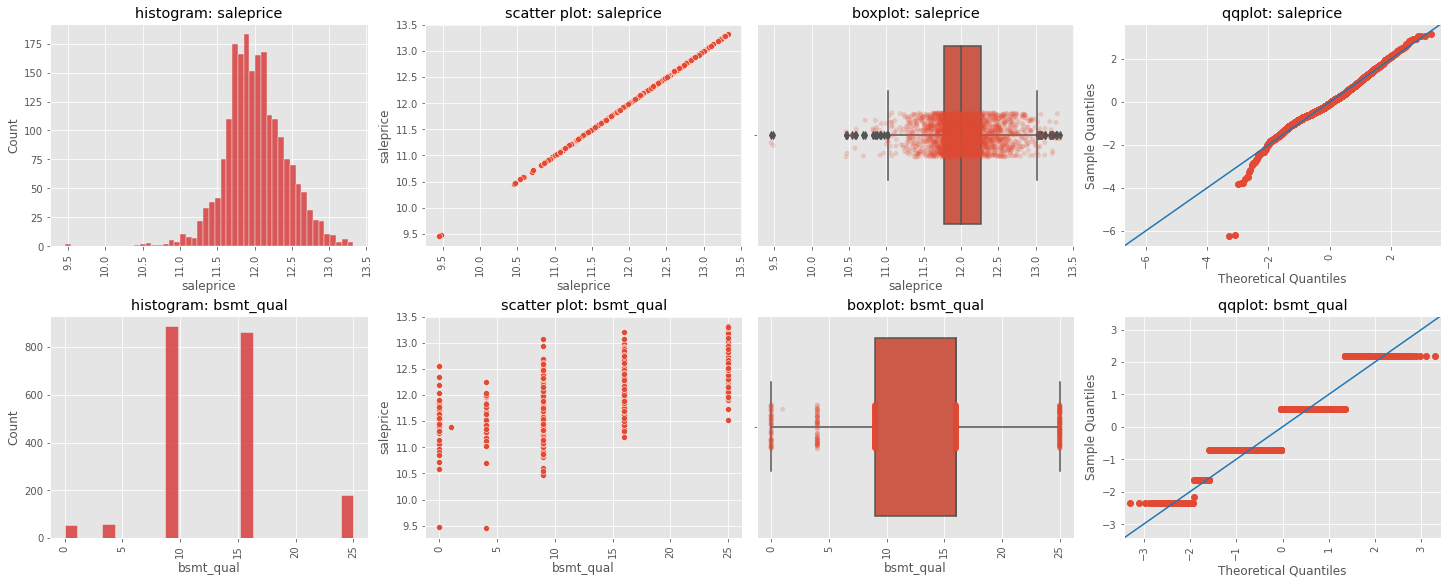

In [59]:
#review the distribution of 2 features that was right-skewed and left-skewed 
plot_func(house_train_selec, ['saleprice', 'bsmt_qual'])

### Data wrangling

In [60]:
#apply one-hot-encoding to test dataframe
cat_df_test = pd.DataFrame(ohe.transform(house_test[cat_features]), columns=ohe.get_feature_names_out())

#create a test dataframe with the selected predictors 
house_test_selec = pd.concat([house_test[selected_num_lst], cat_df_test[selected_cat_lst]], axis=1)

In [61]:
#verify the shapes of the dataframes
print(f'shape of the training df: {house_train_selec.shape}')
print(f'shape of the testing df : {house_test_selec.shape}')

shape of the training df: (2049, 235)
shape of the testing df : (878, 234)


In [62]:
#create target vector y
y_train_validate = house_train_selec['saleprice']
print(f'shape of the target vector: {y_train_validate.shape}')

shape of the target vector: (2049,)


In [63]:
#create feature matrix for training & validation
X_num_train_validate = house_train_selec.drop(columns='saleprice')[selected_num_lst]
X_cat_train_validate = house_train_selec.drop(columns='saleprice')[selected_cat_lst]

#create feature matrix for testing
X_num_test = house_test_selec[selected_num_lst]
X_cat_test = house_test_selec[selected_cat_lst]

In [64]:
#verify the shapes of the dataframes
print('shape of the training matrix')
print('============================')
print(f'categorical:{X_cat_train_validate.shape}\nnumerical  :{X_num_train_validate.shape}')
print('\n')
print('shape of the testing matrix')
print('============================')
print(f'categorical:{X_cat_test.shape}\nnumerical  :{X_num_test.shape}')

shape of the training matrix
categorical:(2049, 178)
numerical  :(2049, 56)


shape of the testing matrix
categorical:(878, 178)
numerical  :(878, 56)


### Merge categorical and numeric feature matrix

In [65]:
#merge categorical and numerical feature matrix 
X_train_validate = pd.concat([X_cat_train_validate, X_num_train_validate], axis=1)
X_test = pd.concat([X_cat_test, X_num_test], axis=1)

In [66]:
#verify the shapes of the dataframes
print(f'shape of the target vector  : {y_train_validate.shape}')
print(f'shape of the training matrix: {X_train_validate.shape}')
print(f'shape of the testing matrix : {X_test.shape}')

shape of the target vector  : (2049,)
shape of the training matrix: (2049, 234)
shape of the testing matrix : (878, 234)


In [67]:
X_test

ms_zoning_A (agr)  ms_zoning_C (all)  ms_zoning_FV  ms_zoning_I (all)  \
0                  0.0                0.0           0.0                0.0   
1                  0.0                0.0           0.0                0.0   
2                  0.0                0.0           0.0                0.0   
3                  0.0                0.0           0.0                0.0   
4                  0.0                0.0           0.0                0.0   
..                 ...                ...           ...                ...   
873                0.0                0.0           0.0                0.0   
874                0.0                0.0           0.0                0.0   
875                0.0                0.0           0.0                0.0   
876                0.0                0.0           0.0                0.0   
877                0.0                0.0           0.0                0.0   

     ms_zoning_RH  ms_zoning_RL  ms_zoning_RM  street_Grvl  street_Pave  \
0             0.0           0.0           1.0          0.0          1.0   
1             0.0           1.0           0.0          0.0          1.0   
2             0.0           1.0           0.0          0.0          1.0   
3             0.0           0.0           1.0          0.0          1.0   
4             0.0           1.0           0.0          0.0          1.0   
..            ...           ...           ...          ...          ...   
873           0.0           1.0           0.0          0.0          1.0   
874           0.0           1.0           0.0          0.0          1.0   
875           0.0           1.0           0.0          0.0          1.0   
876           0.0           1.0           0.0          0.0          1.0   
877           0.0           1.0           0.0          0.0          1.0   

     alley_Grvl  alley_NA  alley_Pave  land_contour_Bnk  land_contour_HLS  \
0           1.0       0.0         0.0               0.0               0.0   
1           0.0       1.0         0.0               0.0               0.0   
2           0.0       1.0         0.0               0.0               0.0   
3           0.0       1.0         0.0               0.0               0.0   
4           0.0       1.0         0.0               0.0               0.0   
..          ...       ...         ...               ...               ...   
873         0.0       1.0         0.0               0.0               0.0   
874         0.0       1.0         0.0               0.0               0.0   
875         0.0       1.0         0.0               0.0               0.0   
876         0.0       1.0         0.0               0.0               0.0   
877         0.0       1.0         0.0               0.0               0.0   

     land_contour_Low  land_contour_Lvl  lot_config_Corner  \
0                 0.0               1.0                0.0   
1                 0.0               1.0                0.0   
2                 0.0               1.0                0.0   
3                 0.0               1.0                0.0   
4                 0.0               1.0                0.0   
..                ...               ...                ...   
873               0.0               1.0                0.0   
874               0.0               1.0                0.0   
875               0.0               1.0                0.0   
876               0.0               1.0                0.0   
877               0.0               1.0                1.0   

     lot_config_CulDSac  lot_config_FR2  lot_config_FR3  lot_config_Inside  \
0                   0.0             0.0             0.0                1.0   
1                   0.0             0.0             0.0                1.0   
2                   0.0             0.0             0.0                1.0   
3                   0.0             0.0             0.0                1.0   
4                   0.0             0.0             0.0                1.0   
..                  ...      

### Splitting training and validation data set 
For this project, the data set would be split into 3 categories, training, validation and testing. The data set with all the known variables (predictors) and sale price (target variable) will made up the training and validation data set. In order to valuate our model's performances, the validation data will be withheld from training and use for evaluation only. Finally, using the selected model, the testing data would be used to predict sale price and evaluated at Kaggle. 

For this project, the data would be split into such:  
- Train: 80%, Validation: 20% 

In [68]:
#apply train_test_split() on the testing matrix
X_train, X_validate, y_train, y_validate = train_test_split(X_train_validate, y_train_validate, test_size=0.2, random_state=52)

In [69]:
print(f'shape of the training matrix X         : {X_train.shape}')
print(f'shape of the training target vector y  : {y_train.shape}')
print(f'shape of the validation matrix X       : {X_validate.shape}')
print(f'shape of the validation target vector y: {y_validate.shape}')

shape of the training matrix X         : (1639, 234)
shape of the training target vector y  : (1639,)
shape of the validation matrix X       : (410, 234)
shape of the validation target vector y: (410,)


### Standardisation of numerical features
If the variables have a largely different scale, linear regression model could be biased towards one feature and affect the accuracy of model. As such, standardisation of data is required before fit our data into model.

In [70]:
#apply standardization dataframe
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_validate = ss.fit_transform(X_validate)
X_test = ss.fit_transform(X_test)
#transform fit array to dataframe
X_train = pd.DataFrame(X_train, columns=ss.get_feature_names_out())
X_validate = pd.DataFrame(X_validate, columns=ss.get_feature_names_out())
X_test = pd.DataFrame(X_test, columns=ss.get_feature_names_out())

In [71]:
#verify the shapes of the array
print(f'shape of the training matrix X: {X_train.shape}')
print(f'shape of the validation matrix X: {X_validate.shape}')
print(f'shape of the test matrix X: {X_test.shape}')

shape of the training matrix X: (1639, 234)
shape of the validation matrix X: (410, 234)
shape of the test matrix X: (878, 234)


# 5. Modeling
The following model would be fitted and evaluated for this project:
- linear regression 
- ridge regression 
- lasso regression 
- elastic net regression


### Cross validation

In order to evaluate the optimal hyperparameters for each model, e.g. alphas. l1 ratio, k-fold cross validation was performed. In this project, k is set to 10. 

From the cross validation results blow, we can appreciate that:
- Models with regularisation performed better compared to baseline model (average) and linear regression model. 
- Linear regression model performed badly. Based on the individual RMSE score, there were instances where RMSE return an unreasonably large value. It's standard deviation was also large. As a result, the mean R2 and mean RMSE were extremely large. This suggest that linear regression model is not suitable to be used as a final production model. 
- The performance of ridge, lasso, and elastic net models were very similar.

**Cross validation summary:**

|                |         mean r2         |         r2 std         |       mean rmse       |       rmse std       |           hyperparameters           |
|----------------|:-----------------------:|:----------------------:|:---------------------:|:--------------------:|:-----------------------------------:|
| baseline model |        -0.007273        |        0.007381        |         0.4172        |        0.02624       |                  -                  |
|     linear     | -1.243 $\times 10^{25}$ | 1.838 $\times 10^{25}$ | 1.085$\times 10^{12}$ | 1.12$\times 10^{12}$ |                  -                  |
|      ridge     |          0.9103         |         0.02662        |         0.1232        |        0.02001       |           $\alpha$ = 172.3          |
|      lasso     |          0.9117         |         0.02621        |         0.1223        |        0.02084       |         $\alpha$ = 0.002148         |
|   elastic net  |          0.9121         |         0.02566        |         0.1220        |        0.02013       | $\alpha$ = 0.002148<br>l1 = 0.05125 |

^figures rounded to 4 significant figures 

#### Simple baseline

In [72]:
#instantiate a dummy model using 'mean' strategy 
dummy = DummyRegressor(strategy='mean')

#cross validation with training dataset
dummy_score_r2 = cross_val_score(dummy,  X_train, y_train, cv=10, scoring='r2')
dummy_score_rmse = -cross_val_score(dummy,  X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')

#print r2 and rmse scores
print('CV for dummy baseline \n=======================')
print(f'mean r2 score  : {dummy_score_r2.mean()}')
print(f'r2 std         : {dummy_score_r2.std()}')
print(f'mean rmse score: {dummy_score_rmse.mean()}')
print(f'rmse std       : {dummy_score_rmse.std()}')

CV for dummy baseline 
mean r2 score  : -0.007272843563596765
r2 std         : 0.007380734728811244
mean rmse score: 0.4172886586384855
rmse std       : 0.026242070188205024


#### Linear regression

In [73]:
#instantiate linear model
lr = LinearRegression()

#cross validation with training dataset
lr_score_r2 = cross_val_score(lr, X_train, y_train, cv=10, scoring='r2')
lr_score_rmse = -cross_val_score(lr, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')

#print r2 and rmse scores
print('CV for linear regression \n=======================')
print(f'mean r2 score  : {lr_score_r2.mean()}')
print(f'r2 std         : {lr_score_r2.std()}')
print(f'mean rmse score: {lr_score_rmse.mean()}')
print(f'rmse std       : {lr_score_rmse.std()}')

CV for linear regression 
mean r2 score  : -1.2428594372216986e+25
r2 std         : 1.8378780085665811e+25
mean rmse score: 1085275152725.3093
rmse std       : 1120195090504.129


In [74]:
#verify individual rmse for linear regression
lr_score_rmse

array([2.16213991e+12, 2.19690763e+12, 1.14792885e+12, 4.72781730e+11,
       1.34071505e+10, 1.06413933e-01, 3.51527803e+12, 1.07848072e-01,
       5.64601868e+11, 7.79706359e+11])

#### Ridge

In [75]:
#computing optimal alpha  
ridge_alphas = np.logspace(0, 5, 200)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)

#instantiate ridge regression
ridge = Ridge(alpha= optimal_ridge.alpha_)

#cross validation with training dataset
ridge_score_r2 = cross_val_score(ridge, X_train, y_train, cv=10, scoring='r2')
ridge_score_rmse = -cross_val_score(ridge, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')

#print r2 and rmse scores
print('CV for ridge regression \n=======================')
print(f'optimal alpha  : {optimal_ridge.alpha_}')
print(f'mean r2 score  : {ridge_score_r2.mean()}')
print(f'r2 std         : {ridge_score_r2.std()}')
print(f'mean rmse score: {ridge_score_rmse.mean()}')
print(f'rmse std       : {ridge_score_rmse.std()}')

CV for ridge regression 
optimal alpha  : 172.25859653987874
mean r2 score  : 0.9102848530044229
r2 std         : 0.026620053903193826
mean rmse score: 0.12318639065166266
rmse std       : 0.02000912133892087


#### Lasso

In [76]:
#computing optimal alpha
optimal_lasso = LassoCV(n_alphas=500, cv=10)
optimal_lasso.fit(X_train, y_train)

#instantiate lasso regression
lasso = Lasso(alpha=optimal_lasso.alpha_)

#cross validation with training dataset
lasso_score_r2 = cross_val_score(lasso, X_train, y_train, cv=10, scoring='r2')
lasso_score_rmse = -cross_val_score(lasso, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')

#print r2 and rmse scores
print('CV for lasso regression \n=======================')
print(f'optimal alpha  : {optimal_lasso.alpha_}')
print(f'mean r2 score  : {lasso_score_r2.mean()}')
print(f'r2 std         : {lasso_score_r2.std()}')
print(f'mean rmse score: {lasso_score_rmse.mean()}')
print(f'rmse std       : {lasso_score_rmse.std()}')

CV for lasso regression 
optimal alpha  : 0.0021475994947855676
mean r2 score  : 0.9117204750122158
r2 std         : 0.02621478410915152
mean rmse score: 0.12227978358067608
rmse std       : 0.020841322001269688


#### Elastic net

In [77]:
#computing optimal alpha and l1 ratio
l1_ratio = np.linspace(0.01, 1, 25)
optimal_enet = ElasticNetCV(l1_ratio=l1_ratio, n_alphas=100, cv=10)
optimal_enet.fit(X_train,y_train)

#instantiate elastic net regression
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

#cross validation with training dataset
enet_score_r2 = cross_val_score(enet, X_train, y_train, cv=10, scoring='r2')
enet_score_rmse = -cross_val_score(enet, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')

#print r2 and rmse scores
print('CV for elastic net regression \n=======================')
print(f'optimal alpha   : {optimal_enet.alpha_}')
print(f'optimal l1 ratio: {optimal_enet.l1_ratio_}')
print(f'mean r2 score   : {enet_score_r2.mean()}')
print(f'r2 std          : {enet_score_r2.std()}')
print(f'mean rmse score : {enet_score_rmse.mean()}')
print(f'rmse std        : {enet_score_rmse.std()}')

CV for elastic net regression 
optimal alpha   : 0.029176680886659454
optimal l1 ratio: 0.051250000000000004
mean r2 score   : 0.9121231011680371
r2 std          : 0.025657444699123573
mean rmse score : 0.12200868406270535
rmse std        : 0.02012886269069489


### Validation

After cross validation and and searching for the optimal hyperparameters, the models would be fitted with the training data set and benchmark against the withheld validation data set. 

#### Simple baseline 

In [78]:
#fit model
dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_validate)

#print scores
r2 = r2_score(y_validate, y_pred)
rmse = mean_squared_error(y_validate, y_pred, squared=False)
rmse2 = mean_squared_error(np.exp(y_validate)-1, np.exp(y_pred)-1, squared=False)
print('Validation for dummy baseline \n=======================')
print(f'r2    = {r2}')
print(f'rmse  = {rmse}')
print(f'rmse* = {rmse2}  * applied inverse log transform')

Validation for dummy baseline 
r2    = -5.2511380210562564e-05
rmse  = 0.38465408434760134
rmse* = 74990.79259377685  * applied inverse log transform


#### Linear regression

In [79]:
#fit model
lr.fit(X_train, y_train)
y_pred = lr.predict(X_validate)

#print scores
r2 = r2_score(y_validate, y_pred)
rmse = mean_squared_error(y_validate, y_pred, squared=False)
print('Validation for linear regression \n=======================')
print(f'r2    = {r2}')
print(f'rmse  = {rmse}')

Validation for linear regression 
r2    = -9.319750094516999e+24
rmse  = 1174251380344.9512


#### Ridge

In [80]:
#fit model
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_validate)

#print scores
r2 = r2_score(y_validate, y_pred)
rmse = mean_squared_error(y_validate, y_pred, squared=False)
rmse2 = mean_squared_error(np.exp(y_validate)-1, np.exp(y_pred)-1, squared=False)
print('Validation for ridge regression \n=======================')
print(f'r2    = {r2}')
print(f'rmse  = {rmse}')
print(f'rmse* = {rmse2}  * applied inverse log transform')

Validation for ridge regression 
r2    = 0.932184756699998
rmse  = 0.10016652512653343
rmse* = 17401.55491945374  * applied inverse log transform


#### Lasso

In [81]:
#fit model
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_validate)

#print scores
r2 = r2_score(y_validate, y_pred)
rmse = mean_squared_error(y_validate, y_pred, squared=False)
rmse2 = mean_squared_error(np.exp(y_validate)-1, np.exp(y_pred)-1, squared=False)
print('Validation for lasso regression \n=======================')
print(f'r2    = {r2}')
print(f'rmse  = {rmse}')
print(f'rmse* = {rmse2}  * applied inverse log transform')

Validation for lasso regression 
r2    = 0.9288563671727408
rmse  = 0.1025951816601297
rmse* = 17139.3080006875  * applied inverse log transform


In [82]:
#verify the coefficients of lasso model 
coef_lasso = pd.Series(lasso.coef_, index = X_train.columns)
print(f'For lasso regression: {len(coef_lasso[coef_lasso == 0])} out of {len(coef_lasso)} variables have "0" coefficient')

For lasso regression: 105 out of 234 variables have "0" coefficient


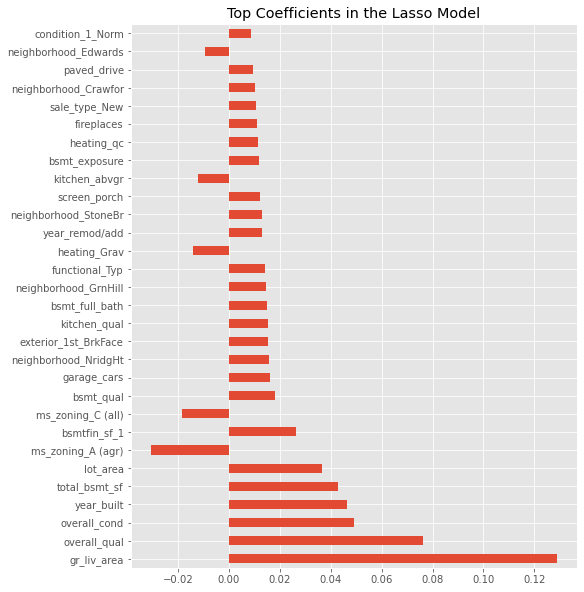

In [83]:
#defining the predictors with high coefficients 
imp_coef_lasso = coef_lasso.reindex(coef_lasso.abs().sort_values(ascending=False).index).head(30)

#plot bar graph 
plt.figure(figsize=(8,10))
imp_coef_lasso.plot(kind = "barh")
plt.title("Top Coefficients in the Lasso Model");

In [84]:
#print top 30 coefficents 
imp_coef_lasso

gr_liv_area             0.128852
overall_qual            0.076459
overall_cond            0.049086
year_built              0.046610
total_bsmt_sf           0.042886
lot_area                0.036552
ms_zoning_A (agr)      -0.030488
bsmtfin_sf_1            0.026503
ms_zoning_C (all)      -0.018496
bsmt_qual               0.018106
garage_cars             0.016074
neighborhood_NridgHt    0.015855
exterior_1st_BrkFace    0.015420
kitchen_qual            0.015307
bsmt_full_bath          0.015186
neighborhood_GrnHill    0.014649
functional_Typ          0.014130
heating_Grav           -0.013886
year_remod/add          0.013115
neighborhood_StoneBr    0.013024
screen_porch            0.012391
kitchen_abvgr          -0.012250
bsmt_exposure           0.011729
heating_qc              0.011364
fireplaces              0.011073
sale_type_New           0.010691
neighborhood_Crawfor    0.010408
paved_drive             0.009484
neighborhood_Edwards   -0.009178
condition_1_Norm        0.008849
dtype: flo

#### Elastic net

In [85]:
#fit model
enet.fit(X_train, y_train)
y_pred = enet.predict(X_validate)

#print scores
r2 = r2_score(y_validate, y_pred)
rmse = mean_squared_error(y_validate, y_pred, squared=False)
rmse2 = mean_squared_error(np.exp(y_validate)-1, np.exp(y_pred)-1, squared=False)
print('Validation for elastic net regression \n=======================')
print(f'r2    = {r2}')
print(f'rmse  = {rmse}')
print(f'rmse* = {rmse2}  * applied inverse log transform')

Validation for elastic net regression 
r2    = 0.9308909082547617
rmse  = 0.10111755001687853
rmse* = 17211.567624677653  * applied inverse log transform


In [86]:
#verify the coefficients of lasso model 
coef_enet = pd.Series(enet.coef_, index = X_train.columns)
print(f'For elastic net regression: {len(coef_enet[coef_enet == 0])} out of {len(coef_enet)} variables have "0" coefficient')

For elastic net regression: 85 out of 234 variables have "0" coefficient


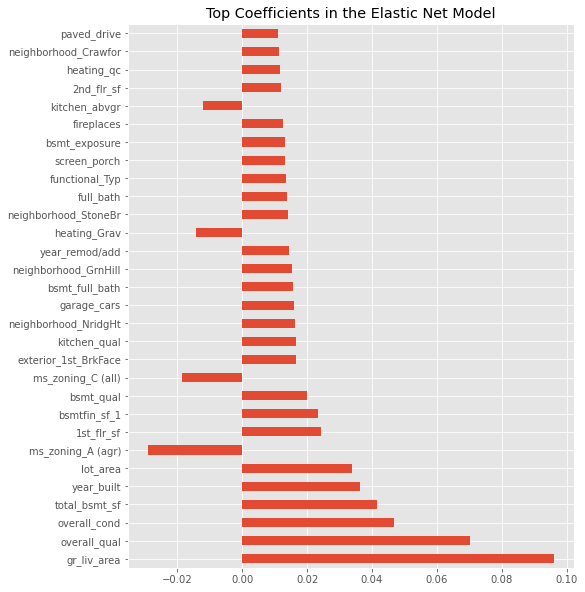

In [87]:
#defining the predictors with high coefficients 
imp_coef_enet = coef_enet.reindex(coef_enet.abs().sort_values(ascending=False).index).head(30)

#plot bar graph 
plt.figure(figsize=(8,10))
imp_coef_enet.plot(kind = "barh")
plt.title("Top Coefficients in the Elastic Net Model");

In [88]:
#print top 30 coefficents 
imp_coef_enet

gr_liv_area             0.096024
overall_qual            0.070175
overall_cond            0.046732
total_bsmt_sf           0.041577
year_built              0.036308
lot_area                0.033797
ms_zoning_A (agr)      -0.028896
1st_flr_sf              0.024299
bsmtfin_sf_1            0.023361
bsmt_qual               0.020110
ms_zoning_C (all)      -0.018561
exterior_1st_BrkFace    0.016695
kitchen_qual            0.016502
neighborhood_NridgHt    0.016157
garage_cars             0.016091
bsmt_full_bath          0.015545
neighborhood_GrnHill    0.015209
year_remod/add          0.014531
heating_Grav           -0.014296
neighborhood_StoneBr    0.014185
full_bath               0.013685
functional_Typ          0.013638
screen_porch            0.013224
bsmt_exposure           0.013051
fireplaces              0.012612
kitchen_abvgr          -0.012032
2nd_flr_sf              0.011823
heating_qc              0.011806
neighborhood_Crawfor    0.011235
paved_drive             0.011148
dtype: flo

### Results insights 

**Summary of results on unseen data set:** 

|       |Dummy regression         | Linear regression       | Ridge   | Lasso  | Elastic net |
|:-----:|:-----------------------:|:-----------------------:|:-------:|:------:|:-----------:|
| r2    | -5.251 $\times 10^{-5}$ | -9.320 $\times 10^{19}$ | 0.9322  | 0.9289 | 0.9309      |
| rmse  | 0.3847                  | 1.174$\times 10^{12}$     | 0.1002  | 0.1026 | 0.1011      |
| rmse* | 74990                   | N.A.                    | 17400   | 17140  | 17210       |

^figures rounded to 4 significant figures  
rmse*: applied inverse log transform to sale price 

**Dummy regression:**

Dummy regression uses 'mean' as a strategy to compute the r2 and rmse results. Generally, it serve as a baseline for comparison. All models except linear regression have out perform this model.

**Linear regression:** 

Model performed badly. Similar to what was observed in the cross validation phase, the RMSE and R2 values were off the expected range. As the rmse was too large, passing a inverse log transform would return an infinity error. As such, there is no rmse* in the table above. The result reinforced the notion that linear regression model _should not_ be selected for the final production model. 

**Ridge regression, lasso & elastic net:**

Ridge model performed the best among all the models, albeit marginally. Results were impressive as models performance was batter compared to the cross-validation results.

**Others:**

Both lasso and elastic net models perform similarly. In the lasso model, it managed to eliminate 105 out of 234 features, whereas elastic net has eliminated 85 out of 234 features. This result suggest that that there were too many predictors that were inconsequential to sale price prediction. To tackle this observation, in the next section of the notebook, a new model would be fitted. However, the model would only be fitted with the features with the top coefficients from lasso model. 



### Feature reduction 
There were 234 features used in the previous models and this could lead to overfitting. A new model would be created based on the top 30 features with the highest absolute coefficients in the lasso model. 

In [89]:
#save top 30 features based on coefficients
top_coef = imp_coef_lasso.index.to_list()

In [90]:
#prepare reduce matrices
X_train_reduced = X_train[top_coef]
X_validate_reduced = X_validate[top_coef]
X_test_reduced = X_test[top_coef]

#### Linear regression (reduced)

In [91]:
#instantiate linear model
lr_reduced = LinearRegression()

#fit model
lr_reduced.fit(X_train_reduced, y_train)
y_pred = lr_reduced.predict(X_validate_reduced)

#print scores
r2 = r2_score(y_validate, y_pred)
rmse = mean_squared_error(y_validate, y_pred, squared=False)
rmse2 = mean_squared_error(np.exp(y_validate)-1, np.exp(y_pred)-1, squared=False)
print('Validation for linear regression \n=======================')
print(f'r2    = {r2}')
print(f'rmse  = {rmse}')
print(f'rmse* = {rmse2}  * applied inverse log transform')

Validation for linear regression 
r2    = 0.9163845407320232
rmse  = 0.11122495420278437
rmse* = 18142.37165558548  * applied inverse log transform


#### Ridge (reduced)

In [92]:
#computing optimal alpha  
ridge_alphas = np.logspace(0, 5, 200)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train_reduced, y_train)

#instantiate ridge regression
ridge_reduced = Ridge(alpha= optimal_ridge.alpha_)

#fit model
ridge_reduced.fit(X_train_reduced, y_train)
y_pred_ridge = ridge_reduced.predict(X_validate_reduced)

#print scores
r2 = r2_score(y_validate, y_pred_ridge)
rmse = mean_squared_error(y_validate, y_pred_ridge, squared=False)
rmse2 = mean_squared_error(np.exp(y_validate)-1, np.exp(y_pred_ridge)-1, squared=False)
print('Validation for ridge regression \n=======================')
print(f'r2    = {r2}')
print(f'rmse  = {rmse}')
print(f'rmse* = {rmse2}  * applied inverse log transform')

Validation for ridge regression 
r2    = 0.9180107206369847
rmse  = 0.1101380747136047
rmse* = 18047.714563660647  * applied inverse log transform


#### Lasso (reduced)

In [93]:
#computing optimal alpha
optimal_lasso = LassoCV(n_alphas=500, cv=10)
optimal_lasso.fit(X_train_reduced, y_train)

#instantiate lasso regression
lasso_reduced = Lasso(alpha=optimal_lasso.alpha_)

#fit model
lasso_reduced.fit(X_train_reduced, y_train)
y_pred_lasso = lasso_reduced.predict(X_validate_reduced)

#print scores
r2 = r2_score(y_validate, y_pred_lasso)
rmse = mean_squared_error(y_validate, y_pred_lasso, squared=False)
rmse2 = mean_squared_error(np.exp(y_validate)-1, np.exp(y_pred_lasso)-1, squared=False)
print('Validation for lasso regression \n=======================')
print(f'r2    = {r2}')
print(f'rmse  = {rmse}')
print(f'rmse* = {rmse2}  * applied inverse log transform')

Validation for lasso regression 
r2    = 0.9170943795249511
rmse  = 0.11075183556653732
rmse* = 18117.240624360587  * applied inverse log transform


#### Elastic net (reduced)

In [94]:
#computing optimal alpha and l1 ratio
l1_ratio = np.linspace(0.01, 1, 25)
optimal_enet = ElasticNetCV(l1_ratio=l1_ratio, n_alphas=100, cv=10)
optimal_enet.fit(X_train_reduced,y_train)

#instantiate elastic net regression
enet_reduced = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

#fit model
enet_reduced.fit(X_train_reduced, y_train)
y_pred_enet = enet_reduced.predict(X_validate_reduced)

#print scores
r2 = r2_score(y_validate, y_pred_enet)
rmse = mean_squared_error(y_validate, y_pred_enet, squared=False)
rmse2 = mean_squared_error(np.exp(y_validate)-1, np.exp(y_pred_enet)-1, squared=False)
print('Validation for elastic net regression \n=======================')
print(f'r2    = {r2}')
print(f'rmse  = {rmse}')
print(f'rmse* = {rmse2}  * applied inverse log transform')

Validation for elastic net regression 
r2    = 0.9178729487758968
rmse  = 0.11023057191913072
rmse* = 18070.661248802528  * applied inverse log transform


### Inferential visualisation

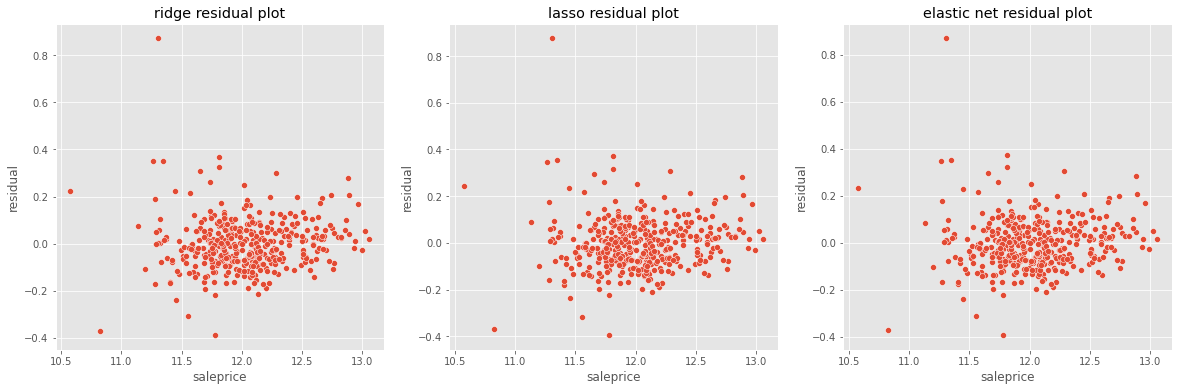

In [95]:
#residual plot
residual = (np.exp(y_validate)-1) - (np.exp(y_pred)-1)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

sns.scatterplot(x=y_validate, y=y_validate - y_pred_ridge, ax=ax[0])
ax[0].set_ylabel('residual')
ax[0].set_title('ridge residual plot')

sns.scatterplot(x=y_validate, y=y_validate - y_pred_lasso, ax=ax[1])
ax[1].set_ylabel('residual')
ax[1].set_title('lasso residual plot')

sns.scatterplot(x=y_validate, y=y_validate - y_pred_enet, ax=ax[2])
ax[2].set_ylabel('residual')
ax[2].set_title('elastic net residual plot')

plt.show()

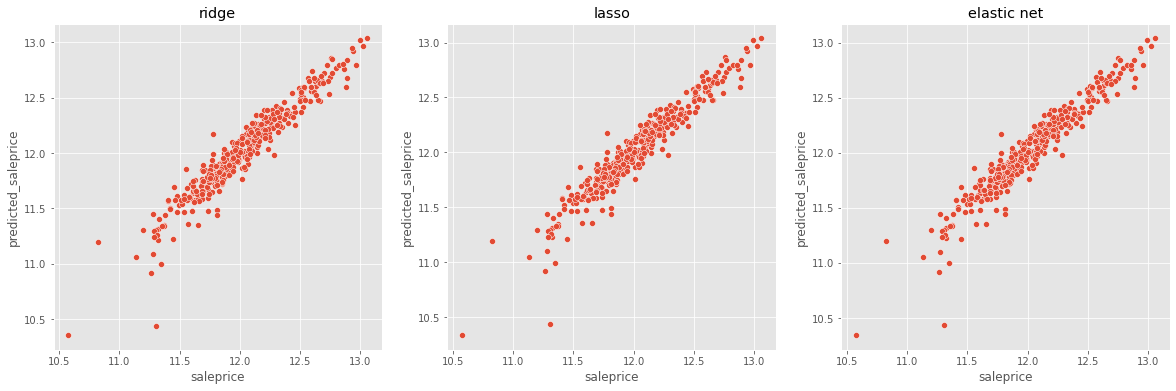

In [96]:
#plot predicted price agaist true price
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

sns.scatterplot(x=y_validate, y=y_pred_ridge, ax=ax[0])
ax[0].set_ylabel('predicted_saleprice')
ax[0].set_title('ridge')

sns.scatterplot(x=y_validate, y=y_pred_lasso, ax=ax[1])
ax[1].set_ylabel('predicted_saleprice')
ax[1].set_title('lasso')

sns.scatterplot(x=y_validate, y=y_pred_enet, ax=ax[2])
ax[2].set_ylabel('predicted_saleprice')
ax[2].set_title('elastic net')

plt.show()

In [97]:
#print coefficients for lasso_reduced
coef_lasso_reduced = pd.Series(lasso_reduced.coef_, index = X_train_reduced.columns)
coef_lasso_reduced

gr_liv_area             0.135620
overall_qual            0.084796
overall_cond            0.057783
year_built              0.072750
total_bsmt_sf           0.045859
lot_area                0.048204
ms_zoning_A (agr)      -0.036866
bsmtfin_sf_1            0.026637
ms_zoning_C (all)      -0.018624
bsmt_qual               0.013645
garage_cars             0.029445
neighborhood_NridgHt    0.015567
exterior_1st_BrkFace    0.015270
kitchen_qual            0.019327
bsmt_full_bath          0.018776
neighborhood_GrnHill    0.015696
functional_Typ          0.016493
heating_Grav           -0.014661
year_remod/add          0.011681
neighborhood_StoneBr    0.014571
screen_porch            0.012773
kitchen_abvgr          -0.013198
bsmt_exposure           0.011538
heating_qc              0.017617
fireplaces              0.014048
sale_type_New           0.016536
neighborhood_Crawfor    0.014310
paved_drive             0.007834
neighborhood_Edwards   -0.008460
condition_1_Norm        0.014498
dtype: flo

In [98]:
#print coefficients for enet_reduced
coef_enet_reduced = pd.Series(enet_reduced.coef_, index = X_train_reduced.columns)
coef_enet_reduced

gr_liv_area             0.132990
overall_qual            0.084052
overall_cond            0.056268
year_built              0.069774
total_bsmt_sf           0.045902
lot_area                0.048071
ms_zoning_A (agr)      -0.036443
bsmtfin_sf_1            0.026404
ms_zoning_C (all)      -0.018633
bsmt_qual               0.015030
garage_cars             0.030172
neighborhood_NridgHt    0.015355
exterior_1st_BrkFace    0.015216
kitchen_qual            0.020225
bsmt_full_bath          0.018473
neighborhood_GrnHill    0.015582
functional_Typ          0.016411
heating_Grav           -0.014586
year_remod/add          0.012948
neighborhood_StoneBr    0.014512
screen_porch            0.012728
kitchen_abvgr          -0.012605
bsmt_exposure           0.011451
heating_qc              0.017885
fireplaces              0.015078
sale_type_New           0.016299
neighborhood_Crawfor    0.014046
paved_drive             0.008841
neighborhood_Edwards   -0.008357
condition_1_Norm        0.014311
dtype: flo

# 6. Final model for kaggle submission
**Summary of validation results:** 

|       | Linear regression    | Ridge   | Lasso  | Elastic net |
|:-----:|:--------------------:|:-------:|:------:|:-----------:|
| r2    | 0.9164               | 0.9180  | 0.9171 | 0.9179      |
| rmse  | 0.1112               | 0.1101  | 0.1108 | 0.1102      |
| rmse* | 18140                | 18047   | 18120  | 18070       |

**Coefficients of the model (elastic net)**

|       Features       | Coefficients | transformation |
|:--------------------:|:------------:|:--------------:|
|      gr_liv_area     |   0.132990   |       log      |
|     overall_qual     |   0.084052   |        -       |
|     overall_cond     |   0.056268   |       log      |
|      year_built      |   0.069774   |     square     |
|     total_bsmt_sf    |   0.045902   |       log      |
|       lot_area       |   0.048071   |       log      |
|   ms_zoning_A (agr)  |   -0.036443  |        -       |
|     bsmtfin_sf_1     |   0.026404   |       log      |
|   ms_zoning_C (all)  |   -0.018633  |        -       |
|       bsmt_qual      |   0.015030   |     square     |
|      garage_cars     |   0.030172   |        -       |
| neighborhood_NridgHt |   0.015355   |        -       |
| exterior_1st_BrkFace |   0.015216   |        -       |
|     kitchen_qual     |   0.020225   |        -       |
|    bsmt_full_bath    |   0.018473   |       log      |
| neighborhood_GrnHill |   0.015582   |        -       |
|    functional_Typ    |   0.016411   |        -       |
|     heating_Grav     |   -0.014586  |        -       |
|    year_remod/add    |   0.012948   |        -       |
| neighborhood_StoneBr |   0.014512   |        -       |
|     screen_porch     |   0.012728   |       log      |
|     kitchen_abvgr    |   -0.012605  |       log      |
|     bsmt_exposure    |   0.011451   |       log      |
|      heating_qc      |   0.017885   |        -       |
|      fireplaces      |   0.015078   |       log      |
|     sale_type_New    |   0.016299   |        -       |
| neighborhood_Crawfor |   0.014046   |        -       |
|      paved_drive     |   0.008841   |     square     |
| neighborhood_Edwards |   -0.008357  |        -       |
|   condition_1_Norm   |   0.014311   |        -       |



Based on the validation scores of the reduced models, the performance of all 3 models were very similar, nevertheless ridge regression edge out slightly in terms of RMSE score. From the residual plot, there is no heteroskedasticity as the data points in the residual plot were evenly randomly distributed across the mean line without any observable patterns. On the predicted sale price against actual sale price graphs, all models returns a close linear relationship with the actual prices.

For the final production model, elastic net is chosen instead. This is because elastic net combines both regularisation characteristics of lasso and ridge i.e. reduces the coefficients of predictors while not eliminating them.



Elastic net production model scored: `19953.69223`


![kaggle](../images/kaggle_score.png)

In [101]:
#create predicted sale price vector based on selected model
y_pred_test = pd.DataFrame(enet_reduced.predict(X_test_reduced), columns={'saleprice'})

#inverse the log transformation
y_pred_test = np.exp(y_pred_test) - 1

#concat the dataframe and create a csv for submission
output = pd.concat([house_test['id'], y_pred_test], axis=1)
output.to_csv('kaggle_20220106.csv', index=False)

In [102]:
#upload to kaggle for scoring
#!kaggle competitions submit -c dsi-us-11-project-2-regression-challenge -f kaggle_20220106.csv -m "enet_reduce"

100%|██████████████████████████████████████| 19.9k/19.9k [00:04<00:00, 5.08kB/s]
Successfully submitted to DSI-US-11 Project 2 Regression Challenge

# 7. Conclusion

**Summary**

_Property price prediction tool:_
The final model, elastic net regression, was able to produce a reliable housing price prediction with a RMSE of `19952`. As a comparison, a baseline model (mean) return a relatively high RMSE of `74990` from the validation data set.

_Key housing attributes that influence prices:_

1. To recap, the 30 features selected for the final model were derived from the first iteration run of a lasso model with 234 features. Based on the coefficients of the final model, the top predictors that influenced the target price the most were `gr_liv_area`, `overall_qual`, `overall_cond`, `year_built`, `total_bsmt_sf`, `lot_area`. 
2. As of our target variable and some predictors were skewed, log transformation and square transformation were applied before fitting. Although this strategy makes the model to produce a better RMSE score, it also reduces the interpretability of the model's coefficients i.e. practical relationship between individual feature against sale price. 
3. For features that were log transformed, their coefficient $\beta$ could be interpret such that for 1% increase in X predictor, y target variable will increase by $1.01^{\beta}$ %
4. For features square transformed, the relationship between predictor $x$ and target variable $y$ can be summarised as such that for every unit increase in X: $\frac{y_{new}}{y} = e^{\beta (2x + 1)}$


**Improvements**

To review the features used in final model as of the features are poorly distributed and likely not a good candidate as a predictor e.g. `paved_drive`

**Recommendation**

Final model is fit for price housing price prediction in Ames, Iowa. Nevertheless, as the most of the predictors were skewed, transformation was applied and hence complicate the interpretation of the linear coefficients. As such, for this model, it is not easy to directly quantify the influence of sale price for every unit increase of each predictor. 